# GENRE CLASSIFICATION
## [SPOTIFY TRACKS DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)


In [4]:
#Only for Google Colab
#from google.colab import files
#uploaded = files.upload()

Saving SpotifyFeatures.csv to SpotifyFeatures.csv


## Data Loading

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import io



#Data Characteristics
spotify_data = pd.read_csv('SpotifyFeatures.csv')
display(spotify_data.head())
display(spotify_data.info())
display(spotify_data.describe())
print("\nUnique genres: ", pd.unique(spotify_data['genre']))


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

None

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000



Unique genres:  ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


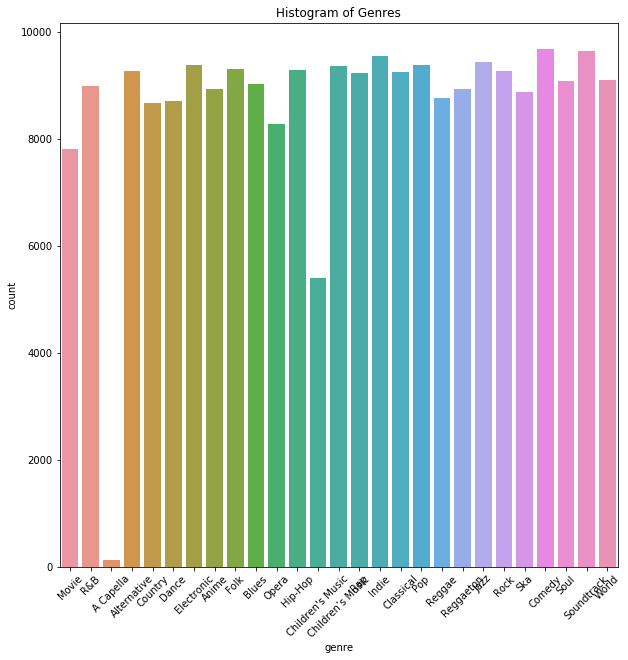

In [2]:
#Bar Chart to show distribution of Genres
plt.subplots(figsize=(10,10))
sn.countplot(spotify_data['genre'])
plt.title('Histogram of Genres')
plt.xticks(rotation=45)
plt.show()



## Encoding:
artist_name: remove 
track_name: remove  
track_id: remove  
key: Factorize by musical scale from 0 to 12, tested with one hot and factorized, feature importance was much greater when factorized  
mode: Binary Encode: Major = 1, Minor = 0  
time_signature: Will convert to linear scale  
genres: Will one hot encode genres  
Condense duplicates and one hot encode songs to show multiple genres  


In [2]:
def one_hot_encode(df, column_name):
    """
    Function to one hot encode a column and remove the old column from data frame
    :param df: pandas data frame that needs encoding
    :param column_name: name of column
    :returns: pandas data frame with one hot encoded columns
    """
    df_one_hot = df.copy()
    df_one_hot = pd.concat([df_one_hot,pd.get_dummies(df_one_hot[column_name], prefix=column_name)],axis=1)
    df_one_hot.drop([column_name],axis=1, inplace=True)
    return df_one_hot



In [3]:
#Factorized Data
#Factorize columns that are strings
def factorized_column(df, column_name):
    """
    Function to factorize a column in a pandas dataframe
    :param df: pandas data frame that needs encoding
    :param column_name: name of column
    :returns: pandas data frame with factorized column and mapping of encoding
    """
    df_factorized = df.copy()
    df_factorized[column_name], mapping = pd.factorize(df[column_name])
    return df_factorized, mapping



In [4]:
#Checking for incomplete data
print("Amount of Null in Data: ", spotify_data.isnull().sum().sum())
print("Amount of N/A in Data: ", spotify_data.isna().sum().sum())
print("No incomplete data")

#Encoding Data as per Encoding Section
spotify_data_encoded = spotify_data.copy()
spotify_data_encoded = one_hot_encode(spotify_data_encoded,'genre')

mode_dictionary = {'Major' : 1, 'Minor' : 0}
spotify_data_encoded['mode'].replace(mode_dictionary, inplace=True)
time_dictionary = {'0/4' : 0, '1/4' : 1, '3/4': 1, '4/4': 4,'5/4': 5}
spotify_data_encoded['time_signature'].replace(time_dictionary, inplace=True)
key_dictionary = {'C' : 1, 'C#' : 2, 'D' : 3, 'D#' : 4, 'E' : 5, 'F' : 6, 'F#' : 7, 'G' : 9, 'G#' : 10, 'A' : 11, 'A#' : 12, 'B' : 12}
spotify_data_encoded['key'].replace(key_dictionary, inplace=True)

print("Encoded key, genre, mode, time_signature")

genre_column_list = []
for genre in pd.unique(spotify_data['genre']):
    genre_column_list.append("genre_"+genre)

#Deleting Duplicates in data with exact values in track_id
#Spotify will categorize 1 unique song into multiple genres
#We will take the first genre that the song is categorized into
spotify_data_encoded = spotify_data_encoded.drop_duplicates(subset='track_id', keep='first')

#Consolodating duplicate tracks to 1 row with one hot encoding of genres
#Will take some time
print("Starting to make track dictionary")
trackid_to_genre_dict = {}
for index, row in spotify_data.iterrows():
    track_id = row['track_id']
    genre = row['genre']
    if track_id in trackid_to_genre_dict:
        trackid_to_genre_dict[track_id].append(genre)
    else:
        trackid_to_genre_dict[track_id] = [genre]
#display(trackid_to_genre_dict)
print("Done making track dictionary")

print("Starting to condense tracks to encoded dataframe")

for index, row in spotify_data_encoded.iterrows():    
    track_id = row['track_id']
    genre_list = trackid_to_genre_dict[track_id]
    for genre in genre_list:
        genre_label = "genre_"+ genre
        spotify_data_encoded.at[index,genre_label] = 1

print("Done condensing tracks to encoded dataframe")

print("Total Songs that were removed due to duplication: ", (spotify_data.shape[0] - spotify_data_encoded.shape[0]))
spotify_data_encoded.drop(['track_name'],axis=1, inplace=True)
spotify_data_encoded.drop(['track_id'],axis=1, inplace=True)
spotify_data_encoded.drop(['artist_name'],axis=1, inplace=True)



"""
#Failed attempts
#Takes way too long

unique_track_list = spotify_data_encoded['track_id']
for track in unique_track_list:
    query_df = spotify_data_encoded.query('track_id == "'+ str(track) + '"')
    for genre in genre_column_list:
        has_true = (query_df[genre] == 1).tolist()
        if True in has_true:
            for index in query_df.index.values.tolist():
                spotify_data_encoded.at[index,genre]=1

Another attempt to get rows done
for index, row in spotify_data.iterrows():
    if(index%1000 == 0):
        print(index)
    track_id = row['track_id']
    index_track = spotify_data_non_duplicates.index[spotify_data_non_duplicates['track_id'] == track_id].tolist()[0]
    genre = row['genre']
    genre_label = "genre_"+ genre
    spotify_data_non_duplicates.at[index_track,genre_label] = 1
"""
print("\nspotify_data_encoded is clean data")
print("\nspotify_data is original data")


Amount of Null in Data:  0
Amount of N/A in Data:  0
No incomplete data
Encoded key, genre, mode, time_signature
Starting to make track dictionary
Done making track dictionary
Starting to condense tracks to encoded dataframe
Done condensing tracks to encoded dataframe
Total Songs that were removed due to duplication:  55951

spotify_data_encoded is clean data

spotify_data is original data


In [5]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

spotify_features = spotify_data_encoded.drop(genre_column_list,axis=1)
spotify_target = spotify_data_encoded[genre_column_list]
#spotify_target.drop(['genre_Children’s Music'],axis=1, inplace=True)
spotify_target = spotify_target.drop(['genre_Children’s Music'],axis=1)

scaler.fit(spotify_features)
spotify_feature_scaler = scaler.transform(spotify_features)
spotify_feature_scaler = pd.DataFrame(spotify_feature_scaler, index=spotify_features.index, columns=spotify_features.columns)

display(spotify_feature_scaler.info())
display(spotify_target.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 176774 entries, 0 to 232724
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        176774 non-null  float64
 1   acousticness      176774 non-null  float64
 2   danceability      176774 non-null  float64
 3   duration_ms       176774 non-null  float64
 4   energy            176774 non-null  float64
 5   instrumentalness  176774 non-null  float64
 6   key               176774 non-null  float64
 7   liveness          176774 non-null  float64
 8   loudness          176774 non-null  float64
 9   mode              176774 non-null  float64
 10  speechiness       176774 non-null  float64
 11  tempo             176774 non-null  float64
 12  time_signature    176774 non-null  float64
 13  valence           176774 non-null  float64
dtypes: float64(14)
memory usage: 25.2 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176774 entries, 0 to 232724
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   genre_Movie             176774 non-null  uint8
 1   genre_R&B               176774 non-null  uint8
 2   genre_A Capella         176774 non-null  uint8
 3   genre_Alternative       176774 non-null  uint8
 4   genre_Country           176774 non-null  uint8
 5   genre_Dance             176774 non-null  uint8
 6   genre_Electronic        176774 non-null  uint8
 7   genre_Anime             176774 non-null  uint8
 8   genre_Folk              176774 non-null  uint8
 9   genre_Blues             176774 non-null  uint8
 10  genre_Opera             176774 non-null  uint8
 11  genre_Hip-Hop           176774 non-null  uint8
 12  genre_Children's Music  176774 non-null  uint8
 13  genre_Rap               176774 non-null  uint8
 14  genre_Indie             176774 non-null  uint8
 15  

None

# Feature Selection

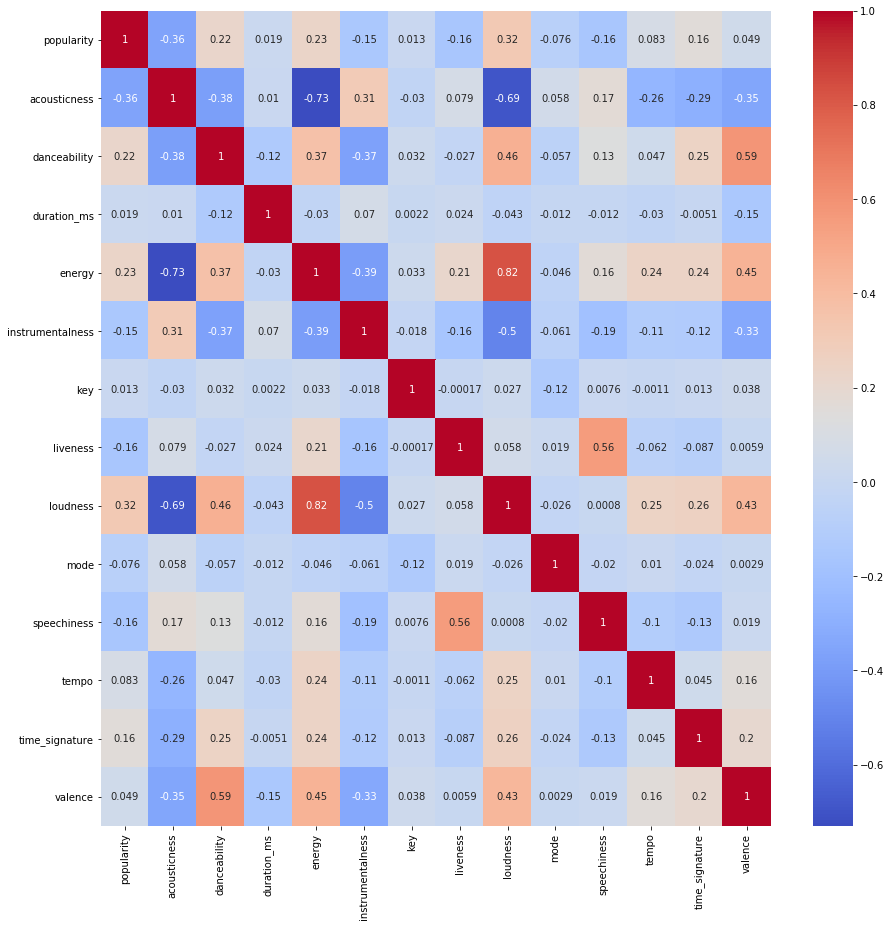

In [6]:

#Find Correlations within data and plotting them on heat map
corr_matric = spotify_feature_scaler.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corr_matric, annot=True, cmap="coolwarm")
plt.show()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.0min finished


Text(0.5, 1.0, 'Feature Importance using ExtraTreeClassidier')

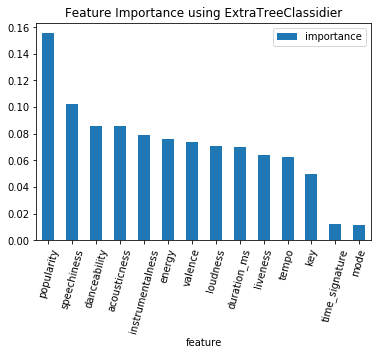

In [7]:
#Feature Selection using importance from model
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(verbose=True,n_jobs=4)
model.fit(spotify_feature_scaler, spotify_target)
# display the relative importance of each attribute

feats = [] # a dict to hold feature_name: feature_importance
for feature, importance in zip(spotify_feature_scaler.columns, model.feature_importances_):
    feats.append([feature, importance]) #add the name/value pair 

sorted_importances = sorted(feats,key=lambda i:i[1], reverse=True)
sorted_importances= pd.DataFrame(np.array(sorted_importances), columns=['feature','importance'])
sorted_importances['importance'] = pd.to_numeric(sorted_importances['importance'])
sorted_importances.plot.bar(x='feature', y='importance', rot=75)
plt.title("Feature Importance using ExtraTreeClassidier")


In [ ]:
#Feature Selection using importance from model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(verbose=True,n_jobs=4)
model.fit(spotify_feature_scaler, spotify_target)
# display the relative importance of each attribute

feats = [] # a dict to hold feature_name: feature_importance
for feature, importance in zip(spotify_feature_scaler.columns, model.feature_importances_):
    feats.append([feature, importance]) #add the name/value pair 
sorted_importances = sorted(feats,key=lambda i:i[1], reverse=True)
sorted_importances= pd.DataFrame(np.array(sorted_importances), columns=['feature','importance'])
sorted_importances['importance'] = pd.to_numeric(sorted_importances['importance'])
sorted_importances.plot.bar(x='feature', y='importance', rot=75)
plt.title("Feature Importance using RandomTreeClassidier")

In [8]:
# Recursive Feature Elimination for genre_Rap, did perform on other columns and had same result
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=4)

# create the RFE model and select 3 attributes
rfe = RFE(model, 1,verbose=True)
rfe = rfe.fit(spotify_feature_scaler,spotify_target['genre_Rap'])
# summarize the selection of the attributes

feats = [] # a dict to hold feature_name: feature_importance
for feature, importance in zip(spotify_feature_scaler.columns, rfe.ranking_):
    feats.append([feature, importance]) #add the name/value pair 
sorted_importances = sorted(feats,key=lambda i:i[1], reverse=False)
sorted_importances= pd.DataFrame(np.array(sorted_importances), columns=['feature','importance'])
sorted_importances['importance'] = pd.to_numeric(sorted_importances['importance'])
display(sorted_importances)



Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


,feature,importance
0,speechiness,1
1,popularity,2
2,danceability,3
3,valence,4
4,acousticness,5
5,tempo,6
6,energy,7
7,duration_ms,8
8,loudness,9
9,liveness,10


# Model Training

## Knn

In [0]:
#Test KNN on Data
#Starting Point for KNN

from sklearn.neighbors import KNeighborsClassifier

k_neighbors = 3
neigh = KNeighborsClassifier(n_neighbors=k_neighbors)
X_train, X_test, y_train, y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))






0.3176254799780581


## Accuracy Score

In [24]:
def raw_accuracy(y_pred,y_test):
    """
    counts how many 0==0 and 1==1 in matrix
    divides by total number in matrix
    """
    total_correct = 0
    total_matrix = len(y_pred)*len(y_pred[0])
    for a in range (0,len(y_pred)):
        for b in range (0,len(y_pred[0])):
            if y_pred[a][b] == y_test[a][b]:
                total_correct = total_correct+1
    
    accuracy = total_correct/total_matrix
    return accuracy
    
def top_2_accuracy(y_pred,y_test):
    top = 2
    """
    Check if 2 genres were correctly classified
    Will return total songs that had at least 2 genres correctly classified
    """
    total_correct = 0
    num_songs = len(y_pred)
    
    for a in range (0,len(y_pred)):
        number_genres_correct =0
        num_genres = np.count_nonzero(y_test[a] == 1)
        #print(num_genres)
        if num_genres < 2:
            number_genres_correct + 1
        for b in range (0,len(y_pred[0])):
            if y_pred[a][b] == 1 and y_test[a][b] == 1:
                number_genres_correct = number_genres_correct +1
        if number_genres_correct >=2:
            total_correct = total_correct+1
    
    print(total_corrent)
    print(num_songs)
    accuracy = total_correct/num_songs
    return accuracy
        
    

## Stratified Model Fitting and testing

In [25]:

def train_test_model(model, data, target):
    """
    Will train 1 model per genre and stratify the input to be 50% true
    and 50% false for the genre, and split and test the data
    
    Print the %accuracy for each genre individually
    
    :param model: sklearn model
    :param data: feature columns
    :param target: all genres
    """
    models = []
    for genre in target.columns:
        target_genre = target[genre]
        data[genre]=target[genre]
        
        target_true = data.loc[data[genre] == 1]
        num_true_rows = target_true.shape[0]
        target_false = data.loc[data[genre] == 0]
        data.drop([genre],axis=1, inplace=True)

        target_false_sampled = target_false.sample(n=num_true_rows,random_state=42)
        stratified = target_true.append(target_false_sampled)
        #display(stratified)
        stratified_target= stratified[genre]
        stratified.drop([genre],axis=1, inplace=True)
        #display(stratified_target)
        #display(stratified)
        #print(np.count_nonzero(np.array(stratified_target)==1)/len(stratified_target))
        
        X_train, X_test, y_train, y_test = train_test_split(stratified,stratified_target, test_size=0.33,random_state=42,stratify=stratified_target)
        #print(np.count_nonzero(y_train==1)/len(y_train))
        #print(np.count_nonzero(y_test==1)/len(y_test))

        md = clone(model)
        md.fit(X_train,y_train)
        y_pred = md.predict(X_test)
        #display(y_pred)
        models.append(md)
        
        print(str(genre) + ": " + str(metrics.accuracy_score(y_pred,y_test)))
        #print(confusion_matrix(y_pred,y_test))
        precision = precision_score(y_pred,y_test)
        print("Precision Score:",precision)

        recall = recall_score(y_pred,y_test)
        print("Recall Score:", recall)
    return models



In [68]:
def train_models(model, data, target):
    """
    Will train 1 model per genre and stratify the input to be 50% true
    and 50% false for the genre and return 26 models
    
    :param model: sklearn model
    :param data: feature columns
    :param target: all genres
    :returns: list of models for each genre
    """
    y_pred_all = []
    models =[]
    for genre in target.columns:
        target_genre = target[genre]
        data[genre]=target[genre]
        
        target_true = data.loc[data[genre] == 1]
        num_true_rows = target_true.shape[0]
        target_false = data.loc[data[genre] == 0]
        data.drop([genre],axis=1, inplace=True)

        target_false_sampled = target_false.sample(n=num_true_rows,random_state=42)
        stratified = target_true.append(target_false_sampled)
        #display(stratified)
        stratified_target= stratified[genre]
        stratified.drop([genre],axis=1, inplace=True)
        #display(stratified_target)
        #display(stratified)
        #print(np.count_nonzero(np.array(stratified_target)==1)/len(stratified_target))
        
        X_train, X_test, y_train, y_test = train_test_split(stratified,stratified_target, test_size=0.33,random_state=42,stratify=stratified_target)
        #print(np.count_nonzero(y_train==1)/len(y_train))
        #print(np.count_nonzero(y_test==1)/len(y_test))
        #print(len(y_test.loc[y_test == 1])/len(y_test))


        md = clone(model)
        md.fit(stratified,stratified_target)
        #y_pred = model.predict(test_data)
        models.append(md)
        #y_pred_all.append(y_pred)
        print(str(genre) + " fitted")
    #y_pred_all_numpy = np.array(y_pred_all)
   # print(y_pred_all_numpy)
    return models

        

def test_models(models,test_data,test_targets):
    y_pred_all = []
    for md in models:
        y_pred = md.predict(test_data)
        
        y_pred_all.append(y_pred)
        
    y_pred_all_numpy = np.array(y_pred_all)
    print("Number of Genres: " + str(len(y_pred_all_numpy)))
    

    #display(y_pred_all_numpy)

    
    y_pred_all_numpy = y_pred_all_numpy.T
    print("Number of Songs Predicted: " + str(len(y_pred_all_numpy)))

    #display(y_pred_all_numpy)
    #display(test_targets)
    
    print("All labels Correct")
    print(metrics.accuracy_score(y_pred_all_numpy,test_targets.to_numpy()))

    print("Raw Accuracy")
    raw_score = raw_accuracy(y_pred_all_numpy,test_targets.to_numpy())
    print(raw_score)
    
    print("Hamming Loss")
    ham_loss = hamming_loss(y_pred_all_numpy,test_targets.to_numpy())
    print(ham_loss)
    
    print("Precision Score")
    precision = precision_score(y_pred_all_numpy,test_targets.to_numpy(),average='samples')
    print(precision)
    
    recall = recall_score(y_pred_all_numpy,test_targets.to_numpy(),average='samples')
    print("Recall Score:", recall)
    
    f1 = f1_score(y_pred_all_numpy,test_targets.to_numpy(),average="samples")
    print("F1:", f1)

    
    print("MultiLabel Matrix")
    multi_label_matrix = multilabel_confusion_matrix(y_pred_all_numpy,test_targets.to_numpy())
    display(multi_label_matrix)
    
def print_trees(models):
    plt.rcParams.update({'font.size': 18})
    plt.rcParams.update({'figure.figsize': [24, 16]})
    plt.figure()
    plot_tree(models[0], filled=True)
    plt.show()


## Import Statements

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import hamming_loss
from sklearn.metrics import precision_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.base import clone


## Decision Trees

### Basic Decision Trees

In [70]:




basic_dt = DecisionTreeClassifier()
basic_dt_X_train, basic_dt_X_test, basic_dt_y_train, basic_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
basic_dt.fit(basic_dt_X_train, basic_dt_y_train)
basic_dt_pred = basic_dt.predict(basic_dt_X_test)

#plt.figure()
#plot_tree(basic_dt, filled=True)
#plt.show()

In [71]:


print("All labels Correct")
print(metrics.accuracy_score(basic_dt_pred,basic_dt_y_test))

print("Raw Accuracy")
raw_score = raw_accuracy(basic_dt_pred,basic_dt_y_test.to_numpy())
print(raw_score)

print("Hamming Loss")
ham_loss = hamming_loss(basic_dt_pred,basic_dt_y_test.to_numpy())
print(ham_loss)

precision = precision_score(basic_dt_pred,basic_dt_y_test.to_numpy(),average="samples")
print("Precision Score:",precision)

recall = recall_score(basic_dt_pred,basic_dt_y_test.to_numpy(),average="samples")
print("Recall Score:", recall)

f1 = f1_score(basic_dt_pred,basic_dt_y_test.to_numpy(),average="samples")
print("F1:", f1)

print("MultiLabel Matrix")
multi_label_matrix = multilabel_confusion_matrix(basic_dt_pred,basic_dt_y_test.to_numpy())
for genre_current, matrix in zip(genre_column_list,multi_label_matrix):
    print(genre_current)
    print(matrix)

All labels Correct
0.3442299780581459
Raw Accuracy
0.9416266245411199
Hamming Loss
0.05837337545888012
Precision Score: 0.4290469170388946


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall Score: 0.42474633812658347
F1: 0.41687300479127143
MultiLabel Matrix
genre_Movie
[[54235  1521]
 [ 1523  1057]]
genre_R&B
[[52927  2227]
 [ 2509   673]]
genre_A Capella
[[58256    42]
 [   33     5]]
genre_Alternative
[[52731  2229]
 [ 2632   744]]
genre_Country
[[53407  1977]
 [ 2097   855]]
genre_Dance
[[53278  2019]
 [ 2290   749]]
genre_Electronic
[[53346  1871]
 [ 1917  1202]]
genre_Anime
[[53676  1683]
 [ 1653  1324]]
genre_Folk
[[52884  2304]
 [ 2330   818]]
genre_Blues
[[53187  2194]
 [ 2209   746]]
genre_Opera
[[54850   783]
 [  780  1923]]
genre_Hip-Hop
[[53657  1651]
 [ 1596  1432]]
genre_Children's Music
[[55874   635]
 [  701  1126]]
genre_Children’s Music
[[53661  1615]
 [ 1610  1450]]
genre_Rap
[[52631  2392]
 [ 2542   771]]
genre_Indie
[[53778  1439]
 [ 1567  1552]]
genre_Classical
[[53771  1409]
 [ 1483  1673]]
genre_Pop
[[53424  2036]
 [ 2067   809]]
genre_Reggae
[[53732  1688]
 [ 1645  1271]]
genre_Reggaeton
[[52988  2241]
 [ 2202   905]]
genre_Jazz
[[53241  1

/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


### MultiOutput Decision Tree

In [72]:

multi_tree_classifier = MultiOutputClassifier(DecisionTreeClassifier(),n_jobs=4)
multi_dt_X_train, multi_dt_X_test, multi_dt_y_train, multi_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)

multi_tree_classifier.fit(multi_dt_X_train,multi_dt_y_train)
multi_dt_y_pred = multi_tree_classifier.predict(multi_dt_X_test)
print("All labels Correct")
print(metrics.accuracy_score(multi_dt_y_pred,multi_dt_y_test))


print("Raw Accuracy")
raw_score = raw_accuracy(multi_dt_y_pred,multi_dt_y_test.to_numpy())
print(raw_score)


print("Hamming Loss")
ham_loss = hamming_loss(multi_dt_y_pred,multi_dt_y_test.to_numpy())
print(ham_loss)

precision = precision_score(multi_dt_y_pred,multi_dt_y_test.to_numpy(),average="samples")
print("Precision Score:",precision)

recall = recall_score(multi_dt_y_pred,multi_dt_y_test.to_numpy(),average="samples")
print("Recall Score:", recall)

f1 = f1_score(multi_dt_y_pred,multi_dt_y_test.to_numpy(),average="samples")
print("F1:", f1)

print("MultiLabel Matrix")
multi_label_matrix = multilabel_confusion_matrix(multi_dt_y_pred,multi_dt_y_test.to_numpy())
for genre_current, matrix in zip(genre_column_list,multi_label_matrix):
    print(genre_current)
    print(matrix)


All labels Correct
0.2428174712013165
Raw Accuracy
0.9400957055150007
Hamming Loss
0.059904294484999364
Precision Score: 0.44607062860799834


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall Score: 0.37315912497061354
F1: 0.38766085597373307
MultiLabel Matrix
genre_Movie
[[54046  1497]
 [ 1712  1081]]
genre_R&B
[[52821  2161]
 [ 2615   739]]
genre_A Capella
[[58248    38]
 [   41     9]]
genre_Alternative
[[52624  2257]
 [ 2739   716]]
genre_Country
[[53273  1893]
 [ 2231   939]]
genre_Dance
[[53042  2040]
 [ 2526   728]]
genre_Electronic
[[53205  1794]
 [ 2058  1279]]
genre_Anime
[[53501  1609]
 [ 1828  1398]]
genre_Folk
[[52683  2290]
 [ 2531   832]]
genre_Blues
[[52912  2122]
 [ 2484   818]]
genre_Opera
[[54794   749]
 [  836  1957]]
genre_Hip-Hop
[[53592  1630]
 [ 1661  1453]]
genre_Children's Music
[[55867   578]
 [  708  1183]]
genre_Children’s Music
[[53653  1602]
 [ 1618  1463]]
genre_Rap
[[52393  2293]
 [ 2780   870]]
genre_Indie
[[53723  1401]
 [ 1622  1590]]
genre_Classical
[[53709  1434]
 [ 1545  1648]]
genre_Pop
[[53162  1963]
 [ 2329   882]]
genre_Reggae
[[53623  1619]
 [ 1754  1340]]
genre_Reggaeton
[[52693  2171]
 [ 2497   975]]
genre_Jazz
[[53166  1

/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


### Training Desision Trees on each stratified genres

In [73]:
print("Decision Tree")
train_test_model(DecisionTreeClassifier(),spotify_feature_scaler,spotify_target)


Decision Tree
genre_Movie: 0.8245341614906833
Precision Score: 0.8225931677018633
Recall Score: 0.8257989088074824
genre_R&B: 0.763100252737995
Precision Score: 0.7485675766767779
Recall Score: 0.7709128774730997
genre_A Capella: 0.8987341772151899
Precision Score: 0.8974358974358975
Recall Score: 0.8974358974358975
genre_Alternative: 0.7461563624468434
Precision Score: 0.7491004252535165
Recall Score: 0.7447154471544716
genre_Country: 0.7933205105787725
Precision Score: 0.8002798181182231
Recall Score: 0.7892376681614349
genre_Dance: 0.7797318474664809
Precision Score: 0.7669801462904912
Recall Score: 0.7869907076483202
genre_Electronic: 0.7826789465180158
Precision Score: 0.7756948933419522
Recall Score: 0.7866273352999017
genre_Anime: 0.8046795523906409
Precision Score: 0.8060359443879281
Recall Score: 0.8038552587081501
genre_Folk: 0.7666992505702183
Precision Score: 0.7611599869664386
Recall Score: 0.7696869851729818
genre_Blues: 0.7395903290799194
Precision Score: 0.7280053727333

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=Non

In [74]:
boost_dt_X_train, boost_dt_X_test, boost_dt_y_train, boost_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
boosted_models = train_test_model(DecisionTreeClassifier(),boost_dt_X_train,boost_dt_y_train)


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Movie: 0.8351202549985511
Precision Score: 0.8382608695652174
Recall Score: 0.8329493087557603
genre_R&B: 0.7642377518030341
Precision Score: 0.755223880597015
Recall Score: 0.7689969604863222


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_A Capella: 0.8333333333333334
Precision Score: 0.7916666666666666
Recall Score: 0.8636363636363636
genre_Alternative: 0.7386801541425819
Precision Score: 0.7389210019267822
Recall Score: 0.7385652383245065


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Country: 0.7857142857142857
Precision Score: 0.787012987012987
Recall Score: 0.7849740932642487
genre_Dance: 0.7773237997957099
Precision Score: 0.7757916241062308
Recall Score: 0.7781762295081968


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Electronic: 0.7897140110550348
Precision Score: 0.7884615384615384
Recall Score: 0.7903614457831325
genre_Anime: 0.7973939703628002
Precision Score: 0.7981604496678589
Recall Score: 0.7969387755102041


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Folk: 0.7696835908756439
Precision Score: 0.7664376840039254
Recall Score: 0.7713580246913581
genre_Blues: 0.7292652552926525
Precision Score: 0.7324364723467862
Recall Score: 0.7277227722772277


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Opera: 0.9342212557760261
Precision Score: 0.9374660141381186
Recall Score: 0.9313884386817937
genre_Hip-Hop: 0.8578048780487805
Precision Score: 0.8634146341463415
Recall Score: 0.85383502170767


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Children's Music: 0.9263727121464226
Precision Score: 0.9267886855241264
Recall Score: 0.9260182876142976
genre_Rap: 0.868828297715549
Precision Score: 0.8614250614250615
Recall Score: 0.8743142144638404


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Indie: 0.7706008074091665
Precision Score: 0.7581947743467934
Recall Score: 0.7773989283974672
genre_Classical: 0.8481257557436518
Precision Score: 0.8592162554426706
Recall Score: 0.840511121628017


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Pop: 0.9033886085075703
Precision Score: 0.8961538461538462
Recall Score: 0.9092682926829269
genre_Reggae: 0.7402862985685071
Precision Score: 0.7428425357873211
Recall Score: 0.7390640895218719


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Reggaeton: 0.8131505458238132
Precision Score: 0.8293550025393601
Recall Score: 0.8032464338416134
genre_Jazz: 0.7494584837545126
Precision Score: 0.7631198844487241
Recall Score: 0.7427366447985004


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Rock: 0.8333333333333334
Precision Score: 0.8345534407027818
Recall Score: 0.8325219084712756
genre_Ska: 0.7879641485275288
Precision Score: 0.8037909836065574
Recall Score: 0.7790466732869911


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Comedy: 0.9622017481691472
Precision Score: 0.967391304347826
Recall Score: 0.9574368568755847
genre_Soul: 0.7267745952677459
Precision Score: 0.7144992526158446
Recall Score: 0.7323799795709908


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Soundtrack: 0.9010392064241851
Precision Score: 0.9055266887104393
Recall Score: 0.8974719101123596
genre_World: 0.7478696741854637
Precision Score: 0.7473684210526316
Recall Score: 0.748118414450577


In [75]:
test_models(boosted_models,boost_dt_X_test,boost_dt_y_test)


Number of Genres: 26
Number of Songs Predicted: 58336
All labels Correct
0.034318431157432806
Raw Accuracy
0.8147027564454197
Hamming Loss
0.18529724355458035
Precision Score


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8148293629025939
Recall Score: 0.22788417967359786
F1: 0.333375701805823
MultiLabel Matrix


array([[[45604,   472],
        [10154,  2106]],

       [[42561,   708],
        [12875,  2192]],

       [[47393,    11],
        [10896,    36]],

       [[41133,   787],
        [14230,  2186]],

       [[43594,   576],
        [11910,  2256]],

       [[44052,   616],
        [11516,  2152]],

       [[43004,   706],
        [12259,  2367]],

       [[44494,   607],
        [10835,  2400]],

       [[42821,   719],
        [12393,  2403]],

       [[40612,   808],
        [14784,  2132]],

       [[51639,   178],
        [ 3991,  2528]],

       [[48202,   430],
        [ 7051,  2653]],

       [[51964,   125],
        [ 4611,  1636]],

       [[48390,   441],
        [ 6881,  2624]],

       [[42862,   753],
        [12311,  2410]],

       [[46207,   416],
        [ 9138,  2575]],

       [[50202,   313],
        [ 5052,  2769]],

       [[41436,   740],
        [14055,  2105]],

       [[44947,   545],
        [10430,  2414]],

       [[41439,   773],
        [13751,  2373]],



### Models for Decision trees training on stratified data and Testing on Randomized Data

In [76]:
boost_dt_X_train, boost_dt_X_test, boost_dt_y_train, boost_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
boosted_models = train_models(DecisionTreeClassifier(),boost_dt_X_train,boost_dt_y_train)


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Movie fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_R&B fitted
genre_A Capella fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Alternative fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Country fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Dance fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Electronic fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Anime fitted
genre_Folk fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Blues fitted
genre_Opera fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

genre_Hip-Hop fitted
genre_Children's Music fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Rap fitted
genre_Indie fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Classical fitted
genre_Pop fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Reggae fitted
genre_Reggaeton fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Jazz fitted
genre_Rock fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

genre_Ska fitted
genre_Comedy fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

genre_Soul fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Soundtrack fitted
genre_World fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
test_models(boosted_models,boost_dt_X_test,boost_dt_y_test)
#print_trees(boosted_models)

Number of Genres: 26
Number of Songs Predicted: 58336
All labels Correct
0.040541003839824466
Raw Accuracy
0.8183296236128107
Hamming Loss
0.18167037638718933
Precision Score


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8163923934905831
Recall Score: 0.23608639141436216
F1: 0.3417126755849617
MultiLabel Matrix


array([[[45768,   477],
        [ 9990,  2101]],

       [[42612,   712],
        [12824,  2188]],

       [[47206,     4],
        [11083,    43]],

       [[41329,   795],
        [14034,  2178]],

       [[43479,   595],
        [12025,  2237]],

       [[43954,   621],
        [11614,  2147]],

       [[43821,   705],
        [11442,  2368]],

       [[44583,   567],
        [10746,  2440]],

       [[42685,   740],
        [12529,  2382]],

       [[41195,   781],
        [14201,  2159]],

       [[51803,   170],
        [ 3827,  2536]],

       [[48509,   430],
        [ 6744,  2653]],

       [[52368,   121],
        [ 4207,  1640]],

       [[48290,   422],
        [ 6981,  2643]],

       [[42817,   703],
        [12356,  2460]],

       [[46307,   405],
        [ 9038,  2586]],

       [[50480,   296],
        [ 4774,  2786]],

       [[41754,   751],
        [13737,  2094]],

       [[45448,   560],
        [ 9929,  2399]],

       [[41996,   764],
        [13194,  2382]],



## Random Forest

### Basic Random Forest

In [79]:
random_dt = RandomForestClassifier(n_estimators =100,n_jobs=4)
random_dt_X_train, random_dt_X_test, random_dt_y_train, random_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
#display(random_dt_y_test)
random_dt.fit(random_dt_X_train, random_dt_y_train)
random_dt_pred = random_dt.predict(random_dt_X_test)

print("All labels Correct")
print(metrics.accuracy_score(random_dt_pred,random_dt_y_test))

print("Raw Accuracy")
raw_score = raw_accuracy(random_dt_pred,random_dt_y_test.to_numpy())
print(raw_score)

precision = precision_score(random_dt_pred,random_dt_y_test.to_numpy(),average="samples")
print("Precision Score:",precision)

recall = recall_score(random_dt_pred,random_dt_y_test.to_numpy(),average="samples")
print("Recall Score:", recall)

f1 = f1_score(random_dt_pred,random_dt_y_test.to_numpy(),average="samples")
print("F1:", f1)


All labels Correct
0.2910381239714756
Raw Accuracy
0.9622768893202245
Precision Score: 0.31479548690019066


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall Score: 0.33473612634850974
F1: 0.31950791093087444


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


### MultiOutput Decision Tree

In [80]:

multi_tree_classifier = MultiOutputClassifier(DecisionTreeClassifier(),n_jobs=4)
multi_dt_X_train, multi_dt_X_test, multi_dt_y_train, multi_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)

multi_tree_classifier.fit(multi_dt_X_train,multi_dt_y_train)

multi_dt_y_pred = multi_tree_classifier.predict(multi_dt_X_test)
print("All labels Correct")
print(metrics.accuracy_score(multi_dt_y_pred,multi_dt_y_test))

precision = precision_score(multi_dt_y_pred,multi_dt_y_test,average="samples")
print("Precision Score:",precision)

recall = recall_score(multi_dt_y_pred,multi_dt_y_test,average="samples")
print("Recall Score:", recall)

print("Raw Accuracy")
raw_score = raw_accuracy(multi_dt_y_pred,multi_dt_y_test.to_numpy())
print(raw_score)

f1 = f1_score(multi_dt_y_pred,multi_dt_y_test.to_numpy(),average="samples")
print("F1:", f1)

All labels Correct
0.24305746023038946


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision Score: 0.44758655930830915
Recall Score: 0.37332964778752975
Raw Accuracy
0.9401088917253893
F1: 0.38841017855262916


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


### Training Random Forests on each stratified genres


In [81]:
print("Random Forest")
train_test_model(RandomForestClassifier(n_jobs=4),spotify_feature_scaler,spotify_target)


Random Forest
genre_Movie: 0.8889751552795031
Precision Score: 0.9006211180124224
Recall Score: 0.8801213960546282
genre_R&B: 0.8384161752316764
Precision Score: 0.8918099089989889
Recall Score: 0.8057247259439708
genre_A Capella: 0.9367088607594937
Precision Score: 0.9487179487179487
Recall Score: 0.925
genre_Alternative: 0.8225384363755316
Precision Score: 0.8917239123323519
Recall Score: 0.7833333333333333
genre_Country: 0.8545200209826893
Precision Score: 0.8800279818118223
Recall Score: 0.8372712146422628
genre_Dance: 0.8495559811944976
Precision Score: 0.8982932776036224
Recall Score: 0.8184703268803555
genre_Electronic: 0.8602359024074971
Precision Score: 0.8532643826761473
Recall Score: 0.8652900688298918
genre_Anime: 0.8782638182434723
Precision Score: 0.8969142082061716
Recall Score: 0.8646616541353384
genre_Folk: 0.8432714239165852
Precision Score: 0.8866080156402737
Recall Score: 0.8158920539730135
genre_Blues: 0.8109469442578912
Precision Score: 0.8206850235057085
Recall S

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                        oob_score=False, random_state=None, verbose=0,
                        warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
        

### Models for Random Forests training on stratified data and Testing on Randomized Data

In [82]:
boost_dt_X_train, boost_dt_X_test, boost_dt_y_train, boost_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
boosted_models = train_models(RandomForestClassifier(n_jobs=4),boost_dt_X_train,boost_dt_y_train)

/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Movie fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_R&B fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_A Capella fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Alternative fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Country fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Dance fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Electronic fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Anime fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Folk fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Blues fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Opera fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Hip-Hop fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Children's Music fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Rap fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Indie fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Classical fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Pop fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Reggae fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Reggaeton fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Jazz fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Rock fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Ska fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Comedy fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Soul fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_Soundtrack fitted


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


genre_World fitted


In [83]:
test_models(boosted_models,boost_dt_X_test,boost_dt_y_test)


Number of Genres: 26
Number of Songs Predicted: 58336
All labels Correct
0.06304854635216676
Raw Accuracy
0.8550894816236972
Hamming Loss
0.1449105183763028
Precision Score


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8988079320455553
Recall Score: 0.3039886002623421
F1: 0.42469745199042447
MultiLabel Matrix


array([[[48453,   239],
        [ 7305,  2339]],

       [[43075,   291],
        [12361,  2609]],

       [[52044,     1],
        [ 6245,    46]],

       [[40734,   322],
        [14629,  2651]],

       [[46042,   351],
        [ 9462,  2481]],

       [[43796,   217],
        [11772,  2551]],

       [[47503,   443],
        [ 7760,  2630]],

       [[47958,   350],
        [ 7371,  2657]],

       [[44205,   363],
        [11009,  2759]],

       [[44429,   495],
        [10967,  2445]],

       [[52794,    84],
        [ 2836,  2622]],

       [[49689,   191],
        [ 5564,  2892]],

       [[53702,    54],
        [ 2873,  1707]],

       [[48516,   146],
        [ 6755,  2919]],

       [[42259,   229],
        [12914,  2934]],

       [[48851,   236],
        [ 6494,  2755]],

       [[50867,   108],
        [ 4387,  2974]],

       [[45604,   459],
        [ 9887,  2386]],

       [[47861,   301],
        [ 7516,  2658]],

       [[45112,   446],
        [10078,  2700]],



# Optimization and Graphs

## Parameter Tuning Decision Trees

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'ccp_alpha': ccp_alphas
               }

display(random_grid)

{'criterion': ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'ccp_alpha': array([0.00000000e+00, 2.15270108e-07, 2.43554888e-07, ...,
        1.78079237e-03, 3.47250796e-03, 3.65978797e-03])}

In [43]:

search_dt_X_train, search_dt_X_test, search_dt_y_train, search_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = DecisionTreeClassifier()
print(rf.get_params().keys())
path = rf.cost_complexity_pruning_path(search_dt_X_train, search_dt_y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#print(ccp_alphas)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, random_state=42, n_jobs = 1)
# Fit the random search model
rf_random.fit(search_dt_X_train, search_dt_y_train)

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=78, criterion=entropy, ccp_alpha=2.893105613516265e-06 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=78, criterion=entropy, ccp_alpha=2.893105613516265e-06, score=0.301, total=   3.7s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=78, criterion=entropy, ccp_alpha=2.893105613516265e-06 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=78, criterion=entropy, ccp_alpha=2.893105613516265e-06, score=0.300, total=   4.2s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=78, criterion=entropy, ccp_alpha=2.893105613516265e-06 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=78, criterion=entropy, ccp_alpha=2.893105613516265e-06, score=0.305, total=   4.1s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=45, criterion=entropy, ccp_alpha=7.411554537142538e-06 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.0s remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=45, criterion=entropy, ccp_alpha=7.411554537142538e-06, score=0.286, total=  12.4s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=45, criterion=entropy, ccp_alpha=7.411554537142538e-06 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.4s remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=45, criterion=entropy, ccp_alpha=7.411554537142538e-06, score=0.290, total=  11.9s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=45, criterion=entropy, ccp_alpha=7.411554537142538e-06 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   36.3s remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=45, criterion=entropy, ccp_alpha=7.411554537142538e-06, score=0.280, total=  11.8s
[CV] min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=34, criterion=entropy, ccp_alpha=8.659729357478391e-07 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   48.1s remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=34, criterion=entropy, ccp_alpha=8.659729357478391e-07, score=0.276, total=   2.6s
[CV] min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=34, criterion=entropy, ccp_alpha=8.659729357478391e-07 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   50.7s remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=34, criterion=entropy, ccp_alpha=8.659729357478391e-07, score=0.286, total=   2.5s
[CV] min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=34, criterion=entropy, ccp_alpha=8.659729357478391e-07 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   53.2s remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=34, criterion=entropy, ccp_alpha=8.659729357478391e-07, score=0.290, total=   2.5s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, criterion=gini, ccp_alpha=9.092715825352312e-07 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   55.7s remaining:    0.0s


[CV]  min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, criterion=gini, ccp_alpha=9.092715825352312e-07, score=0.003, total=   0.3s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, criterion=gini, ccp_alpha=9.092715825352312e-07 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, criterion=gini, ccp_alpha=9.092715825352312e-07, score=0.053, total=   0.3s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, criterion=gini, ccp_alpha=9.092715825352312e-07 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=1, criterion=gini, ccp_alpha=9.092715825352312e-07, score=0.004, total=   0.3s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy, ccp_alpha=1.2371041939254854e-06 
[CV]  min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy, ccp_alpha=1.2371041939254854e-06, score=0

[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=gini, ccp_alpha=9.74219552716319e-07, score=0.313, total=   5.8s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=67, criterion=gini, ccp_alpha=2.996449026407348e-06 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=67, criterion=gini, ccp_alpha=2.996449026407348e-06, score=0.284, total=   2.0s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=67, criterion=gini, ccp_alpha=2.996449026407348e-06 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=67, criterion=gini, ccp_alpha=2.996449026407348e-06, score=0.291, total=   2.0s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=67, criterion=gini, ccp_alpha=2.996449026407348e-06 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=67, criterion=gini, ccp_alpha=2.996449026407348e-06, score=0.288,

[CV]  min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=6.494797018108793e-07, score=0.281, total=   2.4s
[CV] min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=6.494797018108793e-07 
[CV]  min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=6.494797018108793e-07, score=0.282, total=   2.2s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=45, criterion=entropy, ccp_alpha=8.659729357478391e-07 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=45, criterion=entropy, ccp_alpha=8.659729357478391e-07, score=0.282, total=   2.5s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=45, criterion=entropy, ccp_alpha=8.659729357478391e-07 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=45, criterion=entropy, ccp_alpha=8.659729357478391

[CV]  min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=67, criterion=entropy, ccp_alpha=1.190712786653279e-06, score=0.317, total=   5.0s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=67, criterion=entropy, ccp_alpha=1.190712786653279e-06 
[CV]  min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=67, criterion=entropy, ccp_alpha=1.190712786653279e-06, score=0.306, total=   4.6s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=67, criterion=entropy, ccp_alpha=1.190712786653279e-06 
[CV]  min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=67, criterion=entropy, ccp_alpha=1.190712786653279e-06, score=0.321, total=   3.8s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=56, criterion=entropy, ccp_alpha=4.1976191994040586e-06 
[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=56, criterion=entropy, ccp_alpha=4.1976191994040586e-

[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=56, criterion=entropy, ccp_alpha=1.8510171501610067e-06, score=0.286, total=   3.1s
[CV] min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.2123621100469743e-06 
[CV]  min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.2123621100469743e-06, score=0.271, total=   2.6s
[CV] min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.2123621100469743e-06 
[CV]  min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.2123621100469743e-06, score=0.286, total=   2.5s
[CV] min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.2123621100469743e-06 
[CV]  min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.212362

[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=78, criterion=entropy, ccp_alpha=1.3801443663481195e-06, score=0.298, total=   3.4s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=78, criterion=entropy, ccp_alpha=1.3801443663481195e-06 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=78, criterion=entropy, ccp_alpha=1.3801443663481195e-06, score=0.286, total=   3.5s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=78, criterion=entropy, ccp_alpha=1.0716415079879504e-06 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=78, criterion=entropy, ccp_alpha=1.0716415079879504e-06, score=0.280, total=   2.8s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=78, criterion=entropy, ccp_alpha=1.0716415079879504e-06 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=78, criterion=entropy, ccp_alpha=1.0716415079879

[CV]  min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=34, criterion=entropy, ccp_alpha=7.259427121107003e-06, score=0.278, total=   3.3s
[CV] min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=34, criterion=entropy, ccp_alpha=7.259427121107003e-06 
[CV]  min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=34, criterion=entropy, ccp_alpha=7.259427121107003e-06, score=0.284, total=   3.8s
[CV] min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=34, criterion=entropy, ccp_alpha=7.259427121107003e-06 
[CV]  min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=34, criterion=entropy, ccp_alpha=7.259427121107003e-06, score=0.276, total=   3.2s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, criterion=entropy, ccp_alpha=6.170057167203351e-07 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, criterion=entropy, ccp_alpha=6.170057167203351e-

[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=gini, ccp_alpha=1.5154526375587184e-06, score=0.326, total=   3.8s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.443288226246399e-06 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.443288226246399e-06, score=0.274, total=   3.1s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.443288226246399e-06 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.443288226246399e-06, score=0.288, total=   3.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.443288226246399e-06 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=23, criterion=entropy, ccp_alpha=1.443288226246399e-06

[CV]  min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=12, criterion=entropy, ccp_alpha=4.3298646787391953e-07, score=0.248, total=   1.8s
[CV] min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=12, criterion=entropy, ccp_alpha=4.3298646787391953e-07 
[CV]  min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=12, criterion=entropy, ccp_alpha=4.3298646787391953e-07, score=0.241, total=   1.9s
[CV] min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=34, criterion=gini, ccp_alpha=6.494797018108793e-07 
[CV]  min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=34, criterion=gini, ccp_alpha=6.494797018108793e-07, score=0.280, total=   1.3s
[CV] min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=34, criterion=gini, ccp_alpha=6.494797018108793e-07 
[CV]  min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=34, criterion=gini, ccp_alpha=6.494797018108793e-07, 

[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=entropy, ccp_alpha=6.494797018108793e-07, score=0.003, total=   0.3s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=entropy, ccp_alpha=6.494797018108793e-07 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=entropy, ccp_alpha=6.494797018108793e-07, score=0.003, total=   0.3s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=entropy, ccp_alpha=6.494797018108793e-07 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=entropy, ccp_alpha=6.494797018108793e-07, score=0.004, total=   0.3s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=gini, ccp_alpha=3.2473985090543965e-07 
[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=gini, ccp_alpha=3.2473985090543965e-07, sco

[CV]  min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=gini, ccp_alpha=6.494797018108793e-07, score=0.288, total=   1.4s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 13.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

## Parameter Tuning Random Forest


In [40]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

display(random_grid)



{'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [9]:

search_dt_X_train, search_dt_X_test, search_dt_y_train, search_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(verbose=2)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=10, n_jobs = 1)
# Fit the random search model
rf_random.fit(search_dt_X_train, search_dt_y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=0.272, total= 1.3min
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=0.272, total= 1.3min
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.9min remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=0.269, total= 1.3min
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   47.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.8min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, score=0.251, total=  51.6s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   47.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.7min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, score=0.253, total=  52.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   47.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  6.6min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, score=0.252, total=  52.1s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  7.5min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, score=0.251, total=  56.8s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  8.5min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, score=0.251, total=  56.8s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  9.4min remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, score=0.252, total=  57.1s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, score=0.253, total=  49.6s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, score=0.251, total=  50.1s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   44.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished


[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, score=0.249, total=  49.4s
[CV] min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, score=0.264, total= 1.1min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, score=0.264, total= 1.2min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, score=0.265, total= 1.1min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, score=0.263, total= 1.1min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, score=0.265, total= 1.1min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.2s finished


[CV]  min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, score=0.262, total= 1.1min
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.6s finished


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, score=0.273, total= 1.4min
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.6s finished


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, score=0.272, total= 1.4min
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.6s finished


[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, score=0.267, total= 1.4min
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   47.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, score=0.251, total=  52.2s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   48.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.9s finished


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, score=0.253, total=  53.2s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   48.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, score=0.249, total=  52.9s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=0.243, total=  45.3s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished


[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=0.239, total=  45.3s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished


[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=0.240, total=  45.6s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished


[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, score=0.249, total=  49.3s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   44.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished


[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, score=0.252, total=  49.1s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, score=0.246, total=  49.5s
building tree 1 of 100


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 30.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [13]:
print(rf_random.best_params_)

best_random_dt = rf_random.best_estimator_

search_dt_y_pred = best_random_dt.predict(search_dt_X_test)
print("All labels Correct")
print(metrics.accuracy_score(search_dt_y_pred,search_dt_y_test))
print("Raw Accuracy")
raw_score = raw_accuracy(search_dt_y_pred,search_dt_y_test.to_numpy())
print(raw_score)



{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.1s finished


All labels Correct
0.27947111568922134
Raw Accuracy


IndexError: ignored

In [44]:
print(rf_random.best_params_)

best_random_dt = rf_random.best_estimator_

search_dt_y_pred = best_random_dt.predict(search_dt_X_test)
print("All labels Correct")
print(metrics.accuracy_score(search_dt_y_pred,search_dt_y_test))
print("Raw Accuracy")
raw_score = raw_accuracy(search_dt_y_pred,search_dt_y_test.to_numpy())
print(raw_score)

f1 = f1_score(search_dt_y_pred,search_dt_y_test.to_numpy(),average="samples")
print("F1:", f1)


{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 56, 'criterion': 'gini', 'ccp_alpha': 1.1798881249564307e-06}
All labels Correct
0.3314591332967636
Raw Accuracy
0.9490695809949787
F1: 0.3730242331779119


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


## Learning Curves

In [26]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

from sklearn.tree import DecisionTreeClassifier




## Learning Curve Decision Tree

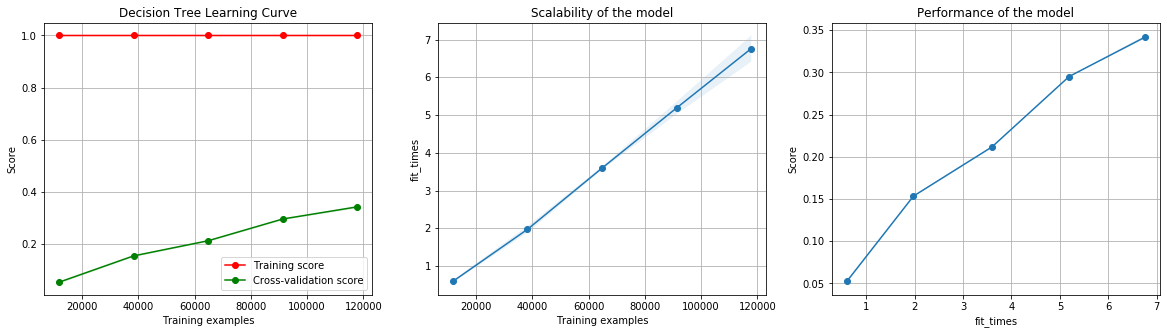

In [30]:

dt = DecisionTreeClassifier()
cv =KFold(n_splits=3, random_state=42, shuffle=True)


plot_learning_curve(dt, "Decision Tree Learning Curve",spotify_feature_scaler, spotify_target,cv = cv, n_jobs=4)
plt.show()

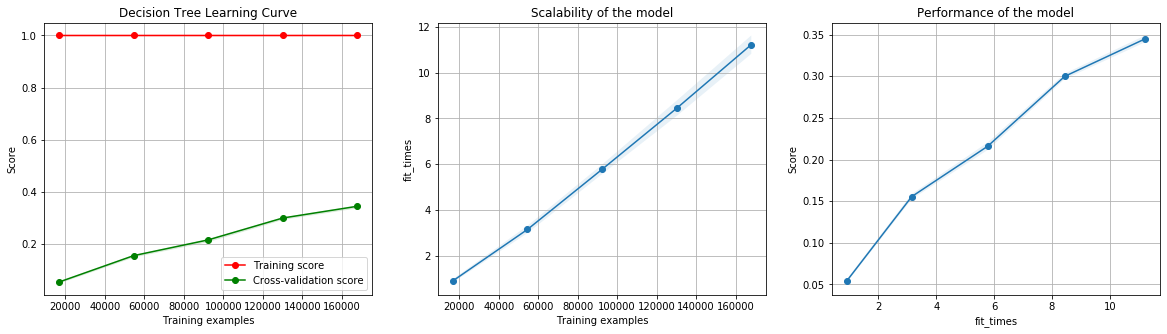

In [36]:
dt = DecisionTreeClassifier()
cv =KFold(n_splits=20, random_state=42, shuffle=True)

plot_learning_curve(dt, "Decision Tree Learning Curve",spotify_feature_scaler, spotify_target,cv = cv, n_jobs=4)
plt.show()

## Learning Curve Random Forest


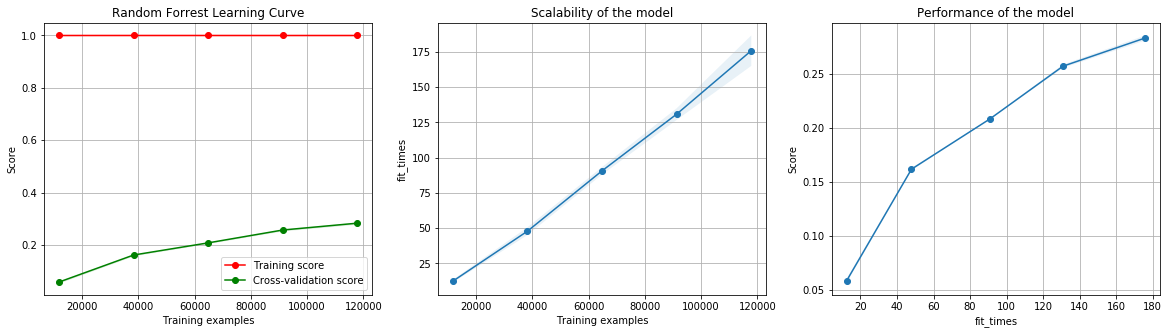

In [33]:
rf = RandomForestClassifier()
cv =KFold(n_splits=3, random_state=42, shuffle=True)
plot_learning_curve(rf, "Random Forest Learning Curve", spotify_feature_scaler, spotify_target, cv = cv, n_jobs=4)
plt.show()

## Precision VS Recall Decision Tree


genre_Movie
Accuracy Score: 0.9473457935466353
Precision Score: 0.45273377618804295
Precision Score: 0.41363211951447243
Precision Score: 0.43230056111246645
genre_R&B
Accuracy Score: 0.920238041363081
Precision Score: 0.26558139534883723
Precision Score: 0.22685736988478347
Precision Score: 0.24469680737090208
genre_A Capella
Accuracy Score: 0.9987554871702041
Precision Score: 0.15151515151515152
Precision Score: 0.15625
Precision Score: 0.15384615384615385
genre_Alternative
Accuracy Score: 0.9138570846721275
Precision Score: 0.24720107478728168
Precision Score: 0.20612397311426436
Precision Score: 0.22480146609651802
genre_Country
Accuracy Score: 0.9295832013395483
Precision Score: 0.3246146660439047
Precision Score: 0.29436679373146973
Precision Score: 0.308751665926255
genre_Dance
Accuracy Score: 0.9236547947685206
Precision Score: 0.2742636407532593
Precision Score: 0.23288232882328824
Precision Score: 0.2518847006651885
genre_Electronic
Accuracy Score: 0.9346517626827171
Precisio

/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Rock
Accuracy Score: 0.9324795221070734
Precision Score: 0.41060735671514115
Precision Score: 0.37412314886983633
Precision Score: 0.3915171288743883


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Ska
Accuracy Score: 0.9399239715798525
Precision Score: 0.46286472148541113
Precision Score: 0.4209891435464415
Precision Score: 0.4409349336702464


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Comedy
Accuracy Score: 0.991469430239399
Precision Score: 0.9293785310734464
Precision Score: 0.9193612774451098
Precision Score: 0.924342765402368


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Soul
Accuracy Score: 0.9111870389645653
Precision Score: 0.2025206431986093
Precision Score: 0.18231611893583724
Precision Score: 0.19188799670578546


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Soundtrack
Accuracy Score: 0.9578675838349097
Precision Score: 0.634185952090946
Precision Score: 0.6191042409829568
Precision Score: 0.6265543521861211


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_World
Accuracy Score: 0.9296058288455447
Precision Score: 0.34264513312963774
Precision Score: 0.3284518828451883
Precision Score: 0.33539841914120916


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


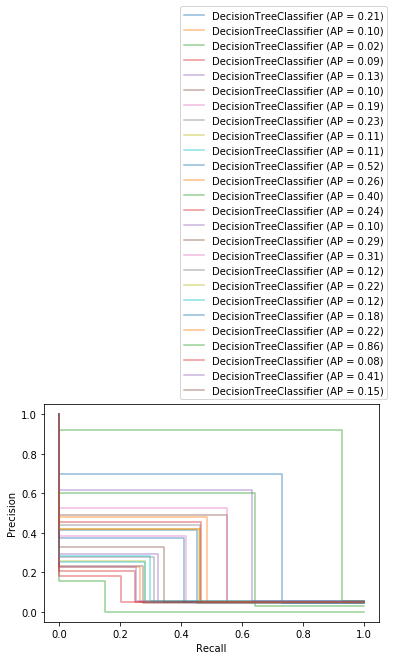

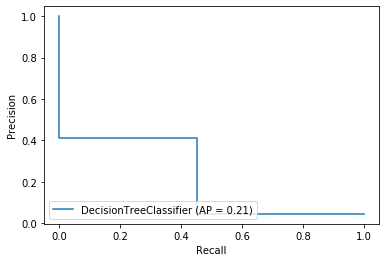

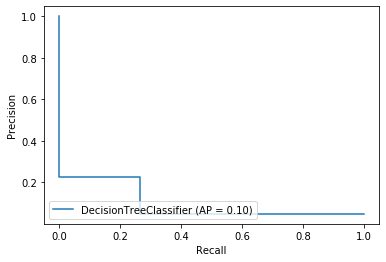

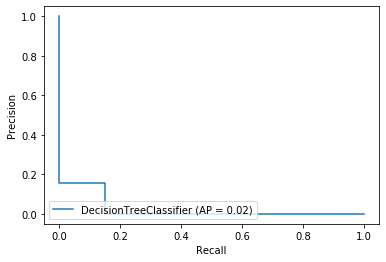

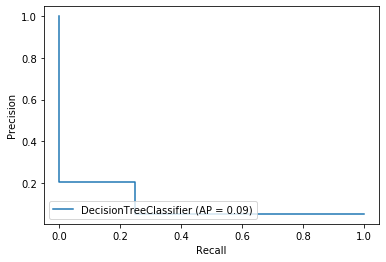

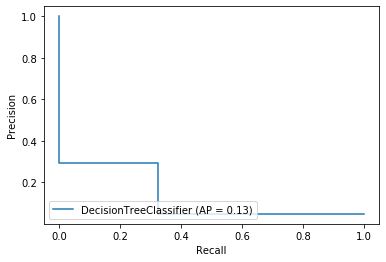

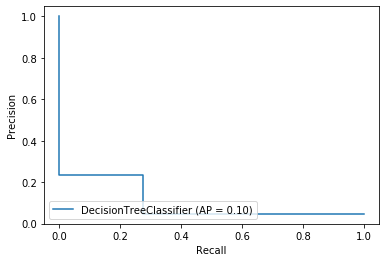

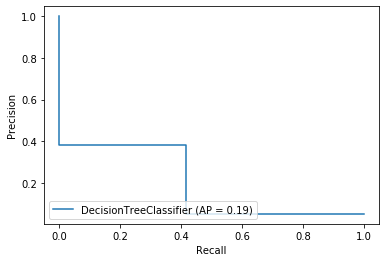

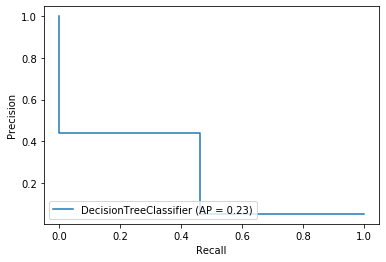

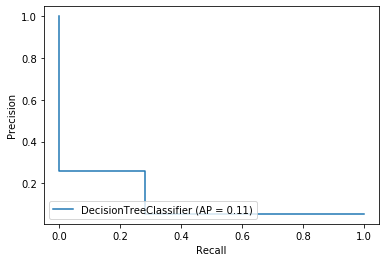

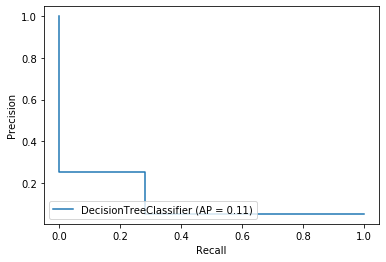

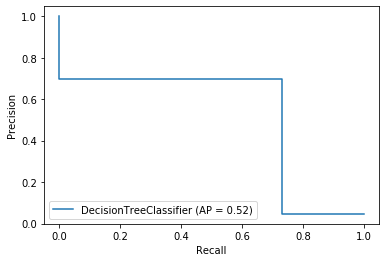

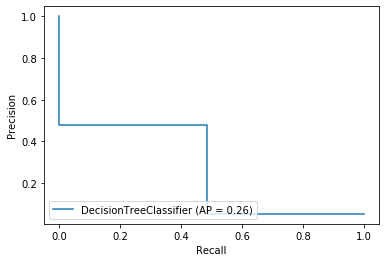

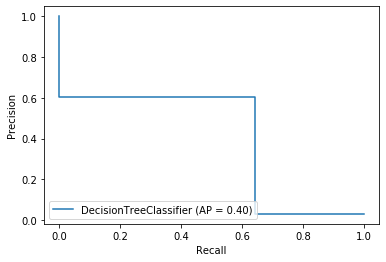

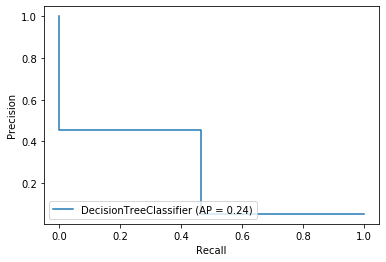

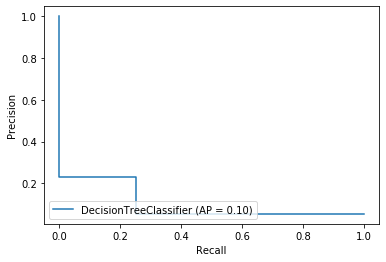

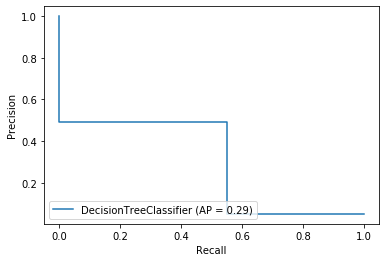

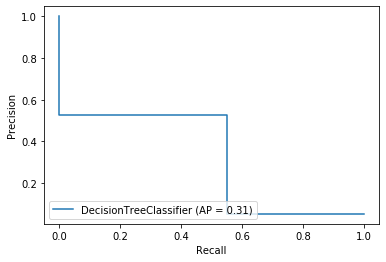

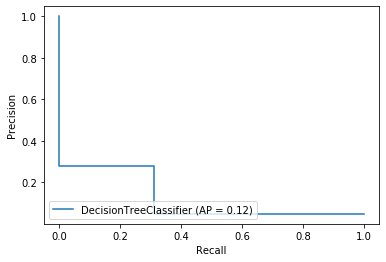

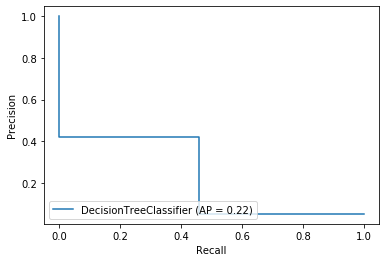

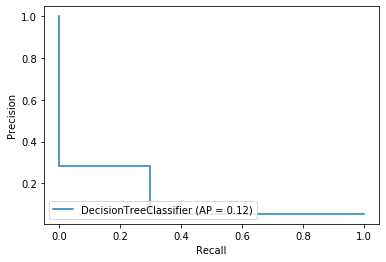

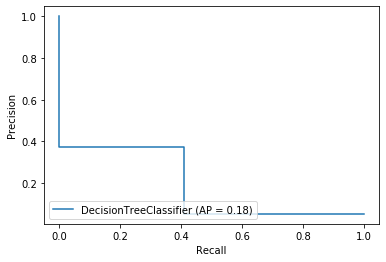

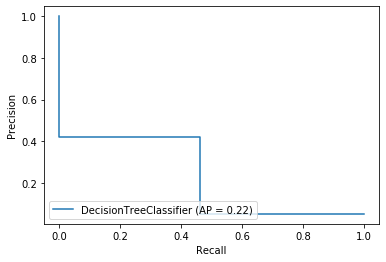

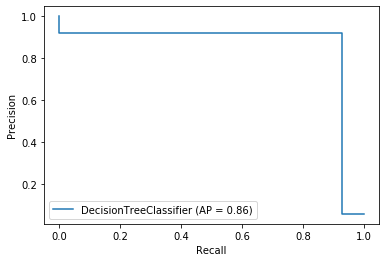

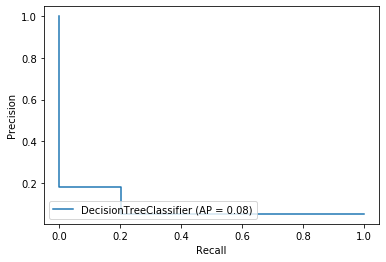

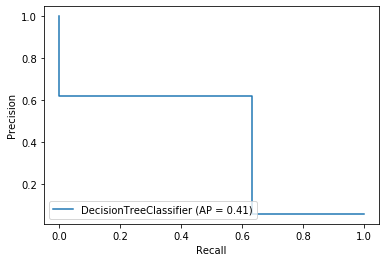

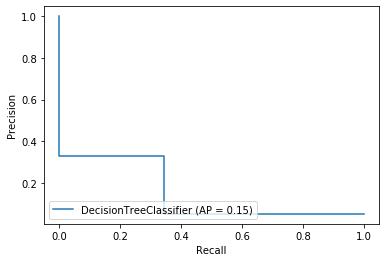

In [48]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import numpy as np

ax = plt.gca()

#ax = plt.figure()
for genre in spotify_target.columns:
    X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(spotify_feature_scaler, spotify_target[genre], random_state=42)
    rfc = DecisionTreeClassifier()
    rfc.fit(X_train_roc, y_train_roc)
    y_pred_roc = rfc.predict(X_test_roc)
    print(genre)
    print("Accuracy Score:",accuracy_score(y_pred_roc,y_test_roc))
    print("Precision Score:",precision_score(y_pred_roc,y_test_roc))
    print("Recall Score:",recall_score(y_pred_roc,y_test_roc))
    print("F1 Score:",f1_score(y_pred_roc,y_test_roc))

    #svc_disp1 = plot_roc_curve(rfc, np.asarray(X_test_roc), np.asarray(y_test_roc))
    #svc_disp1.plot(ax=ax,alpha =0.5)
    #plt.title(genre)
    #plt.legend(bbox_to_anchor=(1.04,1), loc="lower right")
    #ax.legend(bbox_to_anchor=(1.04,1), loc="lower right")
    
    disp = plot_precision_recall_curve(rfc, np.asarray(X_test_roc), np.asarray(y_test_roc))
    disp.plot(ax=ax,alpha=0.5)


ax.legend(bbox_to_anchor=(1.04,1), loc="lower right")
#plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



## Precision VS Recall Random Forest


genre_Movie
Accuracy Score: 0.946847988414717
Precision Score: 0.43944813490035767
Recall Score: 0.4071969696969697
F1 Score: 0.42270828213320233
genre_R&B
Accuracy Score: 0.9200796488211069
Precision Score: 0.2609302325581395
Recall Score: 0.2240415335463259
F1 Score: 0.24108293940696177
genre_A Capella
Accuracy Score: 0.9988459971941892
Precision Score: 0.21212121212121213
Recall Score: 0.21875
F1 Score: 0.21538461538461537
genre_Alternative
Accuracy Score: 0.9143096347920532
Precision Score: 0.23914017017465294
Recall Score: 0.2036613272311213
F1 Score: 0.2199794026776519
genre_Country
Accuracy Score: 0.9303072815314296
Precision Score: 0.3250817375058384
Recall Score: 0.2985842985842986
F1 Score: 0.31127012522361364
genre_Dance
Accuracy Score: 0.9227496945286691
Precision Score: 0.2655721873491067
Recall Score: 0.2251330331559558
F1 Score: 0.24368630926007975
genre_Electronic
Accuracy Score: 0.9349911752726614
Precision Score: 0.4172099087353325
Recall Score: 0.3852327447833066
F1 

/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Rock
Accuracy Score: 0.9343576051047654
Precision Score: 0.4084687767322498
Recall Score: 0.38617064294379294
F1 Score: 0.39700685928081486


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Ska
Accuracy Score: 0.9389736163280084
Precision Score: 0.45181255526083114
Recall Score: 0.41226300927793463
F1 Score: 0.4311326724319764


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Comedy
Accuracy Score: 0.9916051952753767
Precision Score: 0.9317998385794996
Recall Score: 0.9195539625647152
F1 Score: 0.9256364000801763


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Soul
Accuracy Score: 0.9107344888446396
Precision Score: 0.20165145588874403
Recall Score: 0.18040435458786935
F1 Score: 0.190437102400985


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Soundtrack
Accuracy Score: 0.957890211340906
Precision Score: 0.63256191636216
Recall Score: 0.6197295147175815
F1 Score: 0.6260799678521197


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_World
Accuracy Score: 0.9300583789654704
Precision Score: 0.3509384548232213
Recall Score: 0.3338870431893688
F1 Score: 0.34220046818472016


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


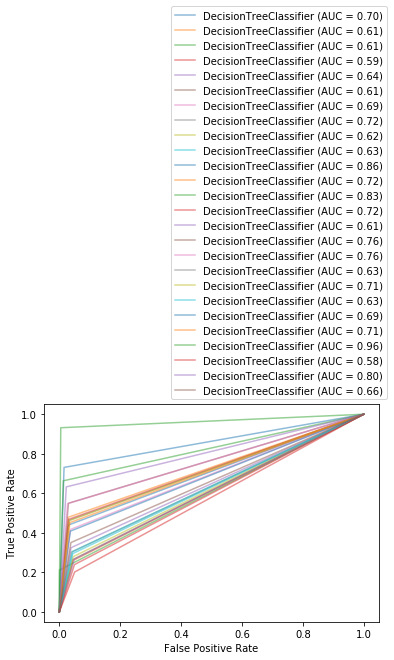

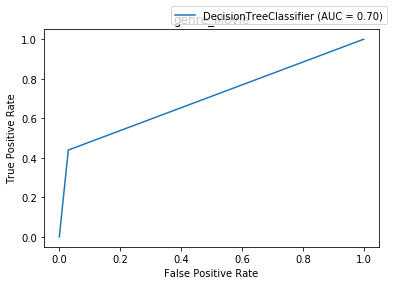

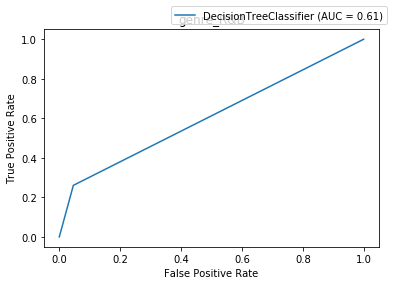

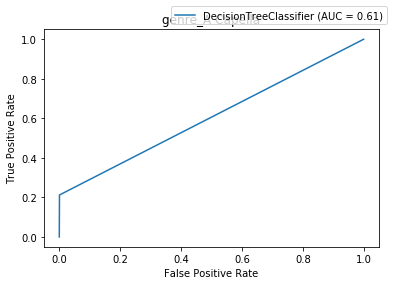

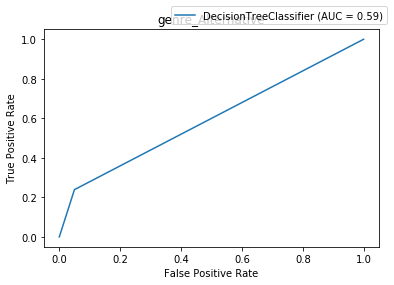

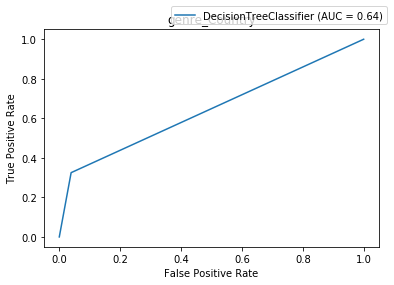

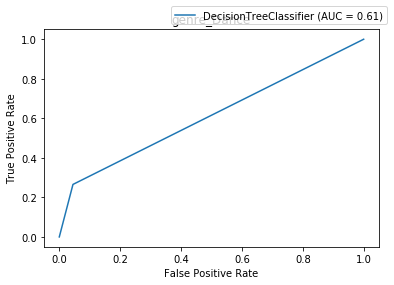

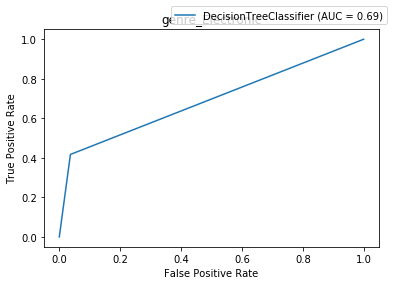

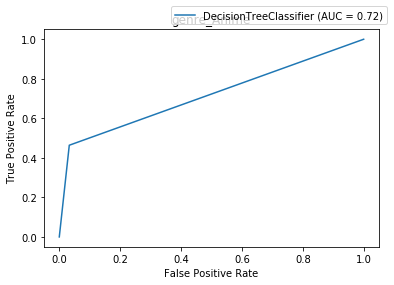

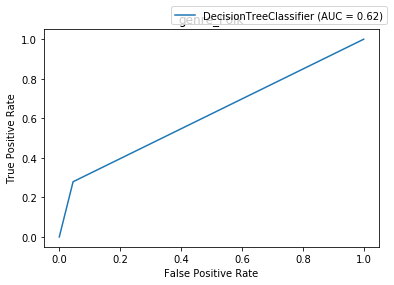

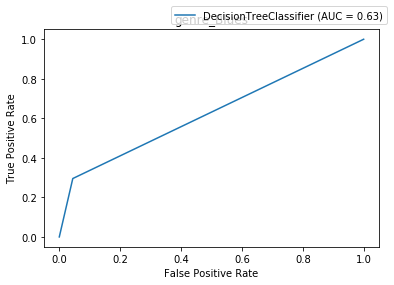

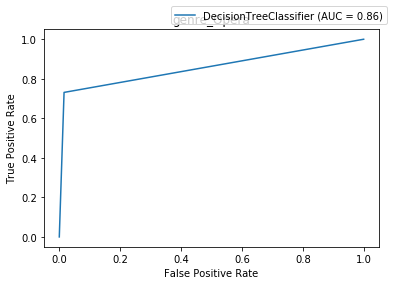

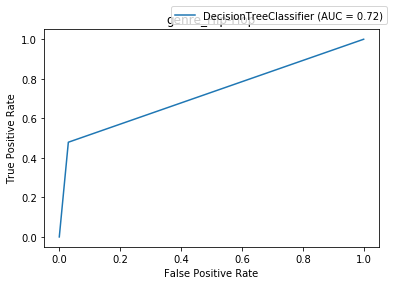

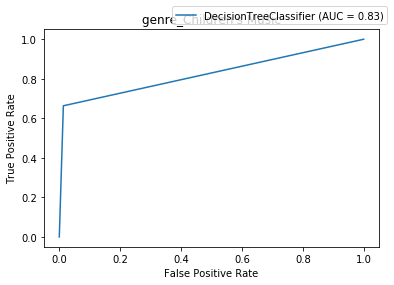

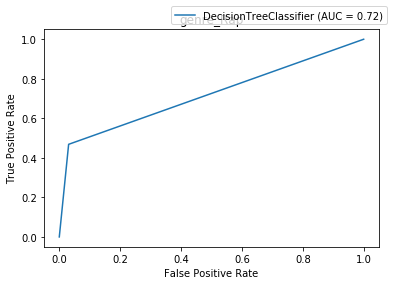

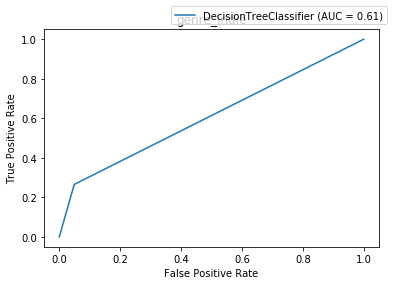

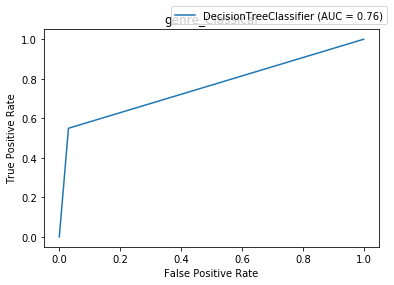

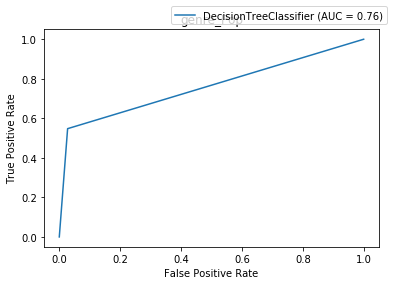

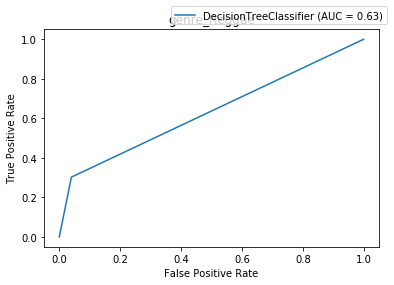

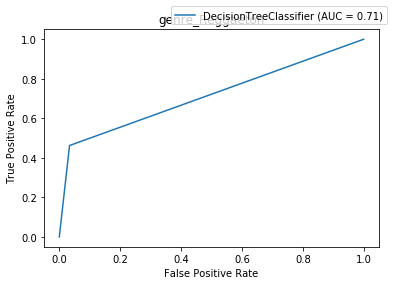

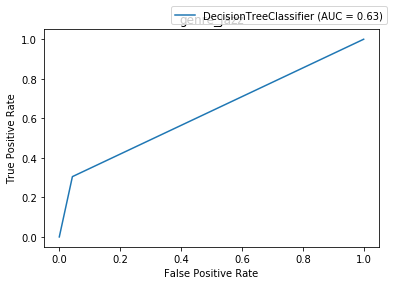

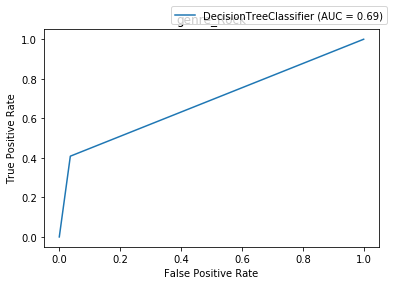

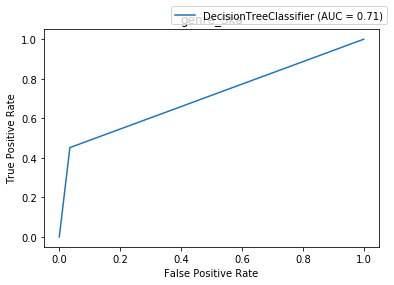

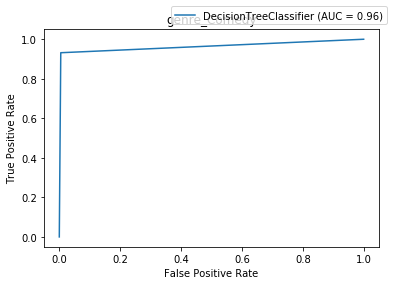

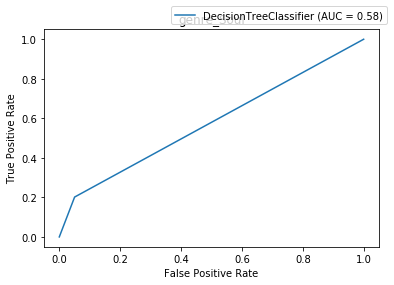

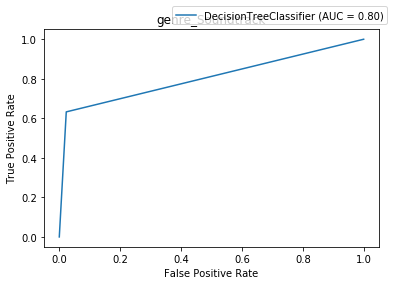

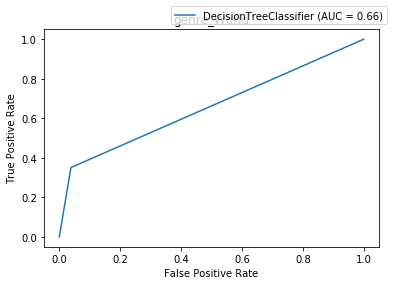

In [67]:
ax = plt.gca()

#ax = plt.figure()
for genre in spotify_target.columns:
    X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(spotify_feature_scaler, spotify_target[genre], random_state=42)
    rfc = DecisionTreeClassifier()
    rfc.fit(X_train_roc, y_train_roc)
    y_pred_roc = rfc.predict(X_test_roc)
    print(genre)
    print("Accuracy Score:",accuracy_score(y_pred_roc,y_test_roc))
    print("Precision Score:",precision_score(y_pred_roc,y_test_roc))
    print("Recall Score:",recall_score(y_pred_roc,y_test_roc))
    print("F1 Score:",f1_score(y_pred_roc,y_test_roc))

    svc_disp1 = plot_roc_curve(rfc, np.asarray(X_test_roc), np.asarray(y_test_roc))
    svc_disp1.plot(ax=ax,alpha =0.5)
    plt.title(genre)
    plt.legend(bbox_to_anchor=(1.04,1), loc="lower right")
    ax.legend(bbox_to_anchor=(1.04,1), loc="lower right")
    


ax.legend(bbox_to_anchor=(1.04,1), loc="lower right")
#plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


## ROC and AUC Random Forest


genre_Movie
Accuracy Score: 0.9635697153459746
Precision Score: 0.27695452222789985
Recall Score: 0.7354138398914518
F1 Score: 0.4023756495916852
genre_R&B
Accuracy Score: 0.9507399194460786
Precision Score: 0.05813953488372093
Recall Score: 0.45126353790613716
F1 Score: 0.1030078285949732
genre_A Capella
Accuracy Score: 0.9992759198081187
Precision Score: 0.030303030303030304
Recall Score: 1.0
F1 Score: 0.05882352941176471
genre_Alternative
Accuracy Score: 0.9489297189663756
Precision Score: 0.09941782355575458
Recall Score: 0.47435897435897434
F1 Score: 0.1643835616438356
genre_Country
Accuracy Score: 0.9553785581753179
Precision Score: 0.17468472676319477
Recall Score: 0.6459412780656304
F1 Score: 0.27499999999999997
genre_Dance
Accuracy Score: 0.951780784721908
Precision Score: 0.07098020280057943
Recall Score: 0.4152542372881356
F1 Score: 0.12123711340206185
genre_Electronic
Accuracy Score: 0.9592931167126759
Precision Score: 0.30073880921338547
Recall Score: 0.7845804988662132
F1

/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Rock
Accuracy Score: 0.9522785898538263
Precision Score: 0.2600513259195894
Recall Score: 0.6160081053698075
F1 Score: 0.3657142857142857


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Ska
Accuracy Score: 0.9612843372403493
Precision Score: 0.3218390804597701
Recall Score: 0.8044198895027624
F1 Score: 0.45974107988632773


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Comedy
Accuracy Score: 0.9949993211748202
Precision Score: 0.9245359160613398
Recall Score: 0.9853763440860215
F1 Score: 0.9539870914012076


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Soul
Accuracy Score: 0.9474136760646241
Precision Score: 0.020425901781833986
Recall Score: 0.4017094017094017
F1 Score: 0.03887510339123242


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Soundtrack
Accuracy Score: 0.9692718468570394
Precision Score: 0.5980511571254568
Recall Score: 0.8001086366105378
F1 Score: 0.6844795539033457


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_World
Accuracy Score: 0.9571435036430285
Precision Score: 0.22959406372762986
Recall Score: 0.8030534351145038
F1 Score: 0.35709436524100474


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/precision_recall_curve.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


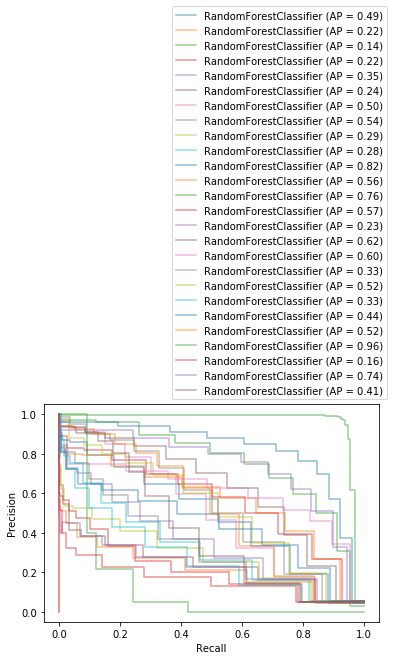

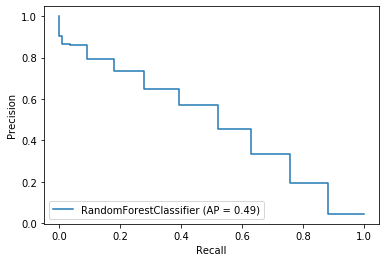

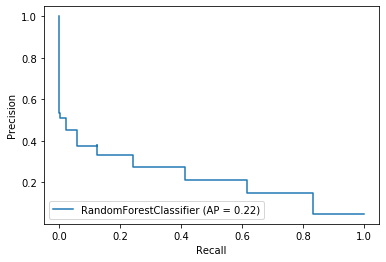

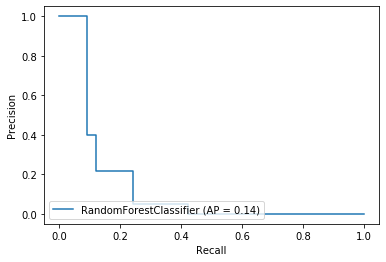

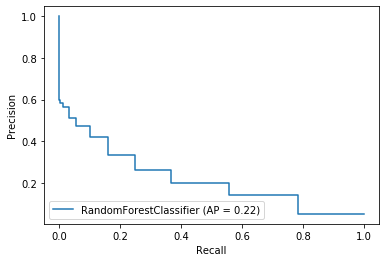

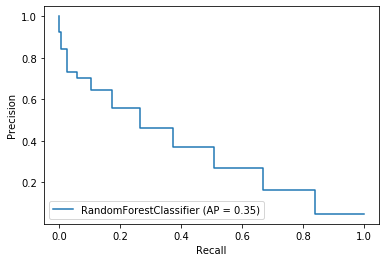

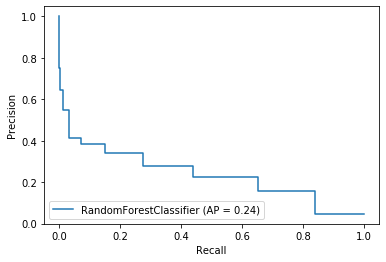

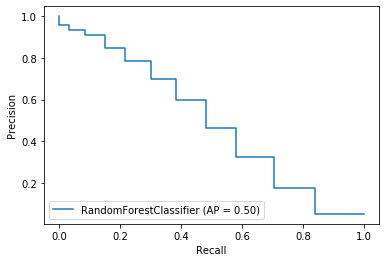

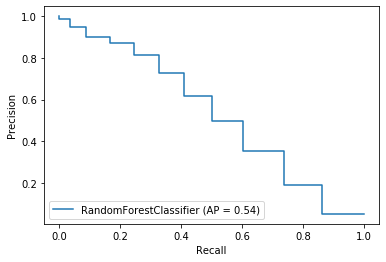

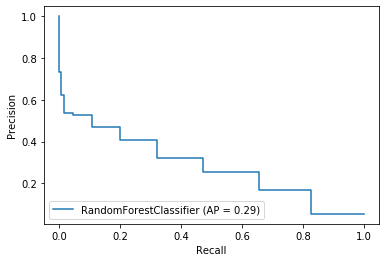

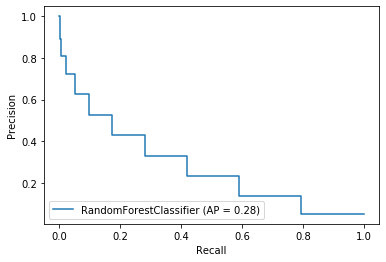

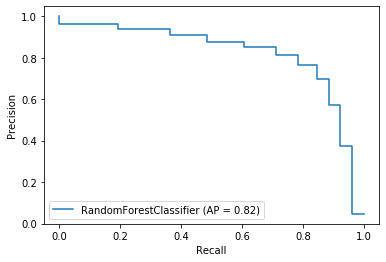

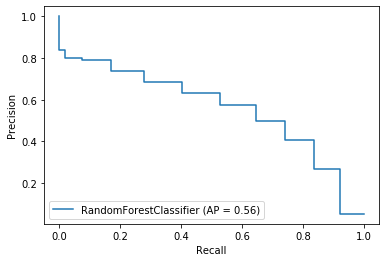

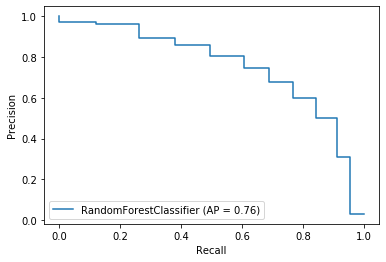

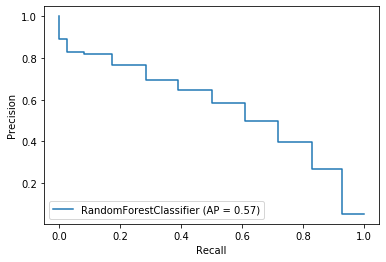

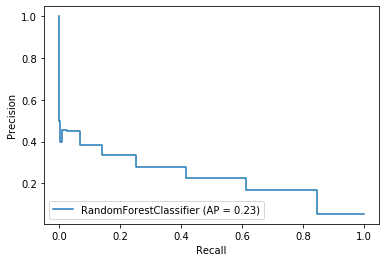

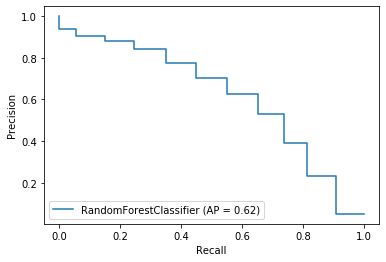

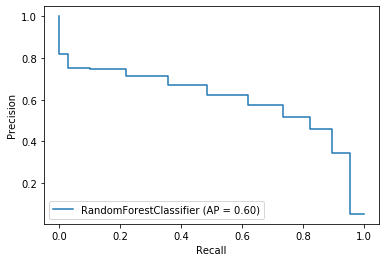

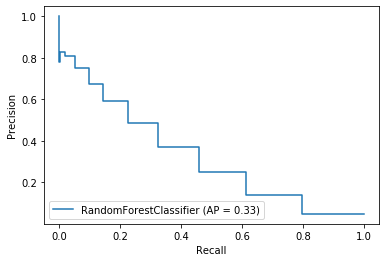

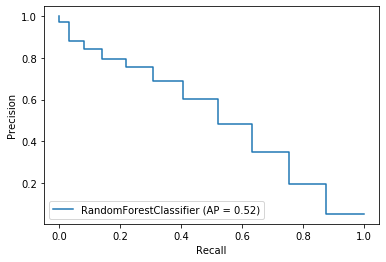

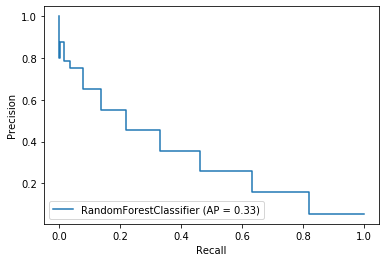

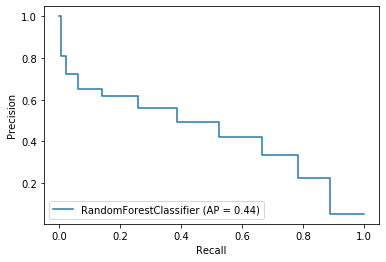

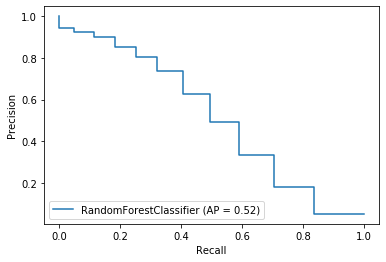

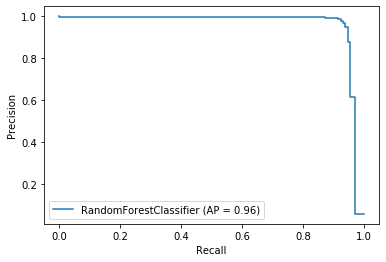

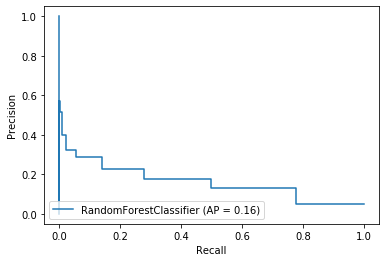

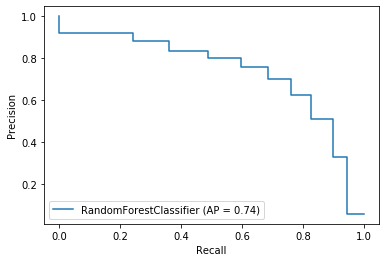

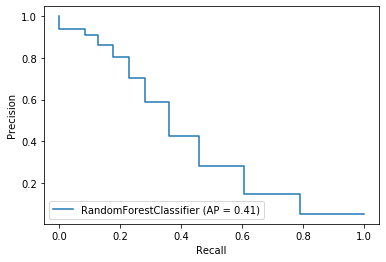

In [49]:
#ax = plt.figure()
ax = plt.gca()

for genre in spotify_target.columns:
    X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(spotify_feature_scaler, spotify_target[genre], random_state=42)
    rfc = RandomForestClassifier(n_estimators=10, random_state=42)
    rfc.fit(X_train_roc, y_train_roc)
    y_pred_roc = rfc.predict(X_test_roc)
    print(genre)
    print("Accuracy Score:",accuracy_score(y_pred_roc,y_test_roc))
    print("Precision Score:",precision_score(y_pred_roc,y_test_roc))
    print("Recall Score:",recall_score(y_pred_roc,y_test_roc))
    print("F1 Score:",f1_score(y_pred_roc,y_test_roc))
    #svc_disp1 = plot_roc_curve(rfc, np.asarray(X_test_roc), np.asarray(y_test_roc))
    #svc_disp1.plot(ax=ax,alpha =0.5)
    #plt.legend(bbox_to_anchor=(1.04,1), loc="lower right")
    #ax.legend(bbox_to_anchor=(1.04,1), loc="lower right")
    disp = plot_precision_recall_curve(rfc, np.asarray(X_test_roc), np.asarray(y_test_roc))
    disp.plot(ax=ax,alpha=0.5)
    
ax.legend(bbox_to_anchor=(1.04,1), loc="lower right")
plt.show()


## ROC and AUC Random Forest


genre_Movie
Accuracy Score: 0.9635697153459746
Precision Score: 0.27695452222789985
Recall Score: 0.7354138398914518
F1 Score: 0.4023756495916852
genre_R&B
Accuracy Score: 0.9507399194460786
Precision Score: 0.05813953488372093
Recall Score: 0.45126353790613716
F1 Score: 0.1030078285949732
genre_A Capella
Accuracy Score: 0.9992759198081187
Precision Score: 0.030303030303030304
Recall Score: 1.0
F1 Score: 0.05882352941176471
genre_Alternative
Accuracy Score: 0.9489297189663756
Precision Score: 0.09941782355575458
Recall Score: 0.47435897435897434
F1 Score: 0.1643835616438356
genre_Country
Accuracy Score: 0.9553785581753179
Precision Score: 0.17468472676319477
Recall Score: 0.6459412780656304
F1 Score: 0.27499999999999997
genre_Dance
Accuracy Score: 0.951780784721908
Precision Score: 0.07098020280057943
Recall Score: 0.4152542372881356
F1 Score: 0.12123711340206185
genre_Electronic
Accuracy Score: 0.9592931167126759
Precision Score: 0.30073880921338547
Recall Score: 0.7845804988662132
F1

/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Rock
Accuracy Score: 0.9522785898538263
Precision Score: 0.2600513259195894
Recall Score: 0.6160081053698075
F1 Score: 0.3657142857142857


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Ska
Accuracy Score: 0.9612843372403493
Precision Score: 0.3218390804597701
Recall Score: 0.8044198895027624
F1 Score: 0.45974107988632773


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Comedy
Accuracy Score: 0.9949993211748202
Precision Score: 0.9245359160613398
Recall Score: 0.9853763440860215
F1 Score: 0.9539870914012076


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Soul
Accuracy Score: 0.9474136760646241
Precision Score: 0.020425901781833986
Recall Score: 0.4017094017094017
F1 Score: 0.03887510339123242


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_Soundtrack
Accuracy Score: 0.9692718468570394
Precision Score: 0.5980511571254568
Recall Score: 0.8001086366105378
F1 Score: 0.6844795539033457


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


genre_World
Accuracy Score: 0.9571435036430285
Precision Score: 0.22959406372762986
Recall Score: 0.8030534351145038
F1 Score: 0.35709436524100474


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_plot/roc_curve.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


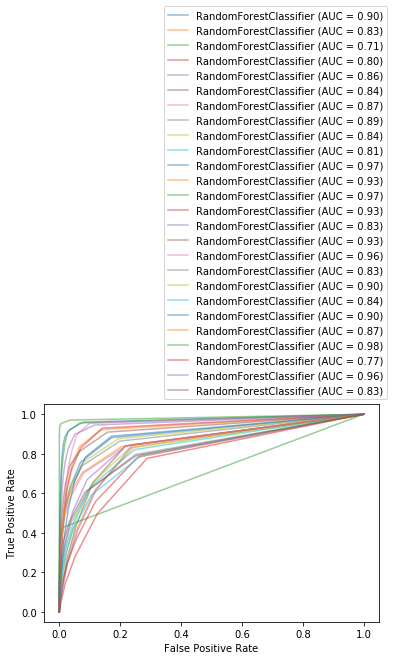

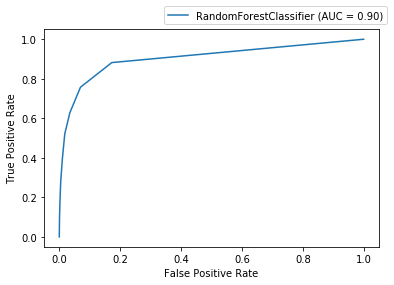

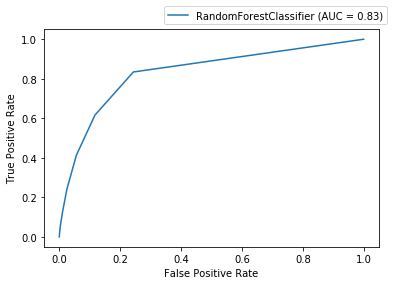

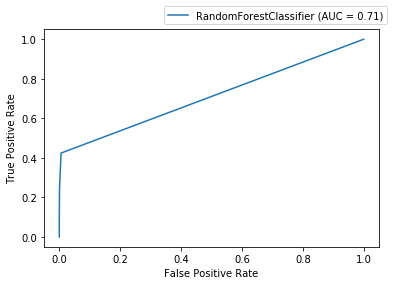

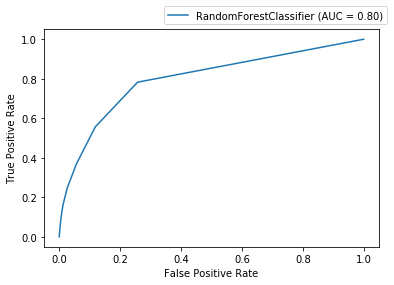

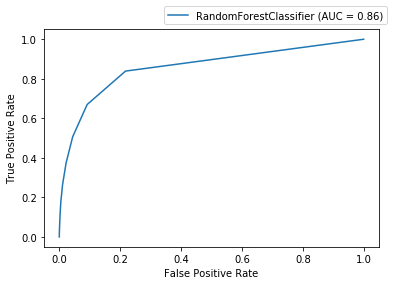

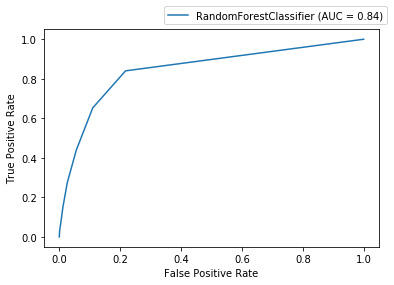

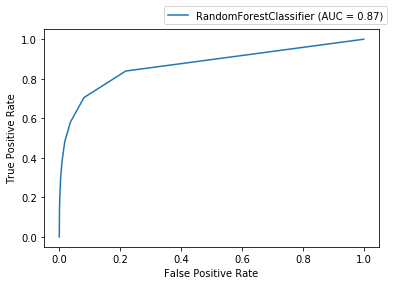

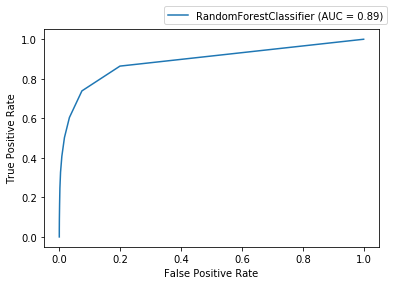

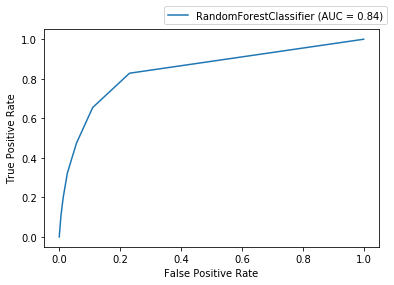

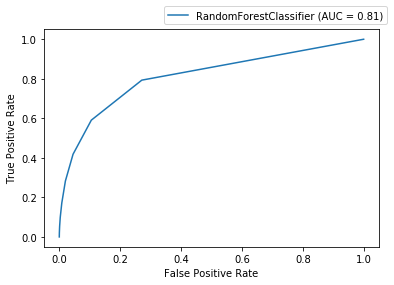

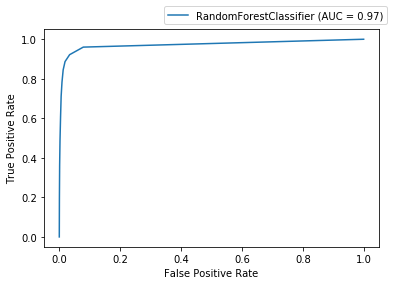

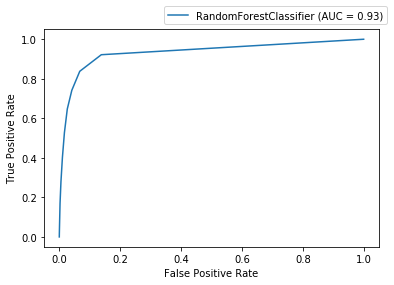

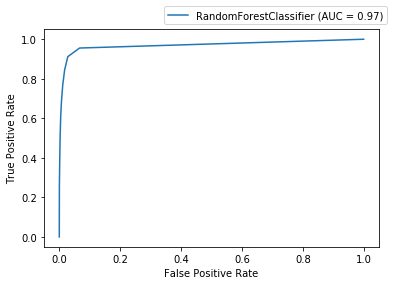

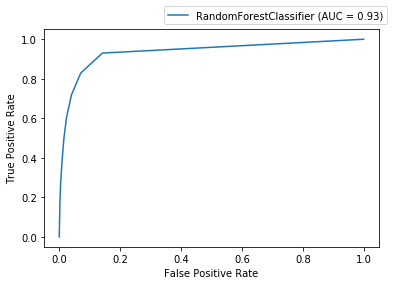

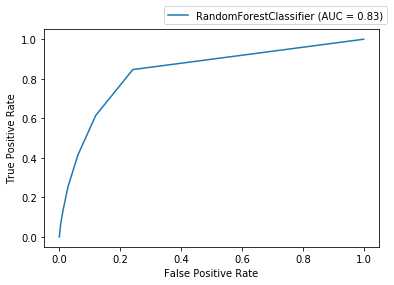

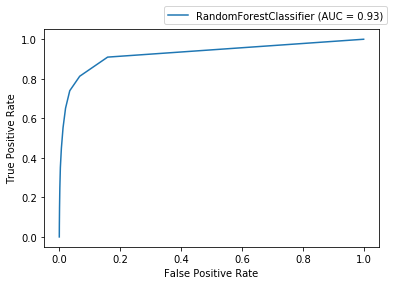

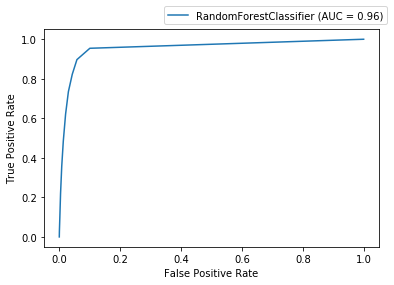

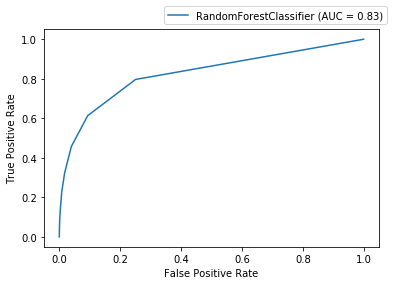

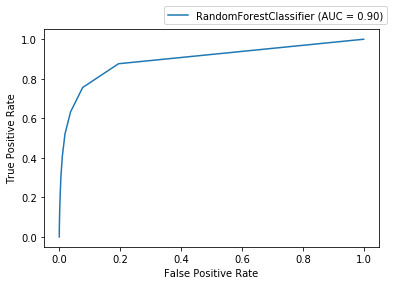

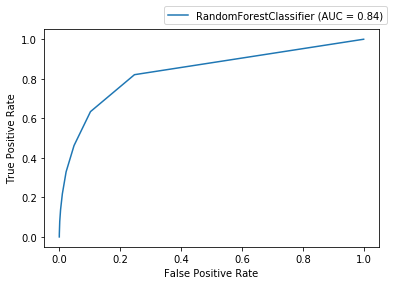

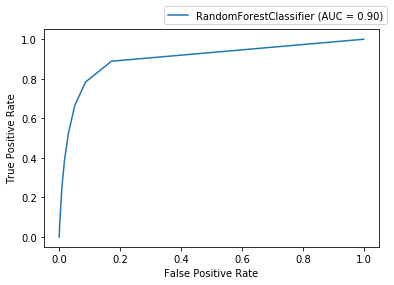

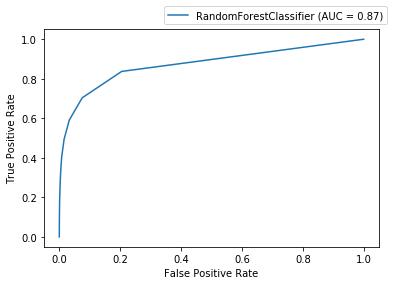

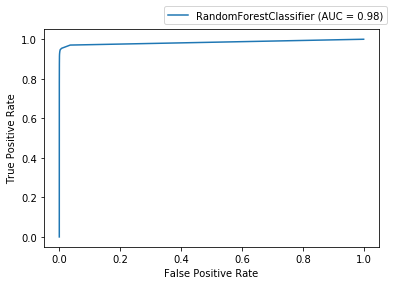

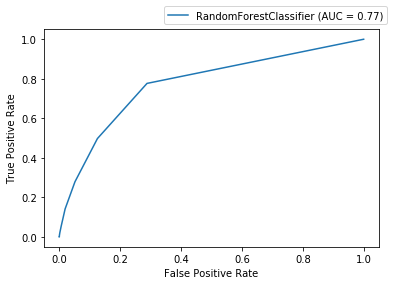

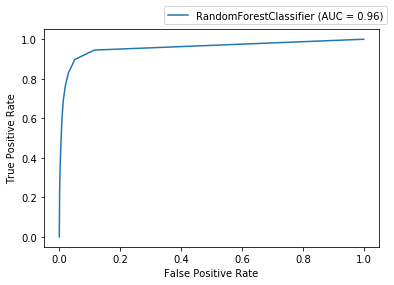

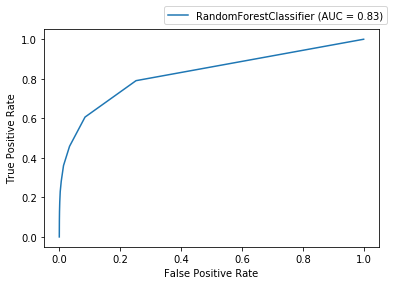

In [50]:
#ax = plt.figure()
ax = plt.gca()

for genre in spotify_target.columns:
    X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(spotify_feature_scaler, spotify_target[genre], random_state=42)
    rfc = RandomForestClassifier(n_estimators=10, random_state=42)
    rfc.fit(X_train_roc, y_train_roc)
    y_pred_roc = rfc.predict(X_test_roc)
    print(genre)
    print("Accuracy Score:",accuracy_score(y_pred_roc,y_test_roc))
    print("Precision Score:",precision_score(y_pred_roc,y_test_roc))
    print("Recall Score:",recall_score(y_pred_roc,y_test_roc))
    print("F1 Score:",f1_score(y_pred_roc,y_test_roc))
    #svc_disp1 = plot_roc_curve(rfc, np.asarray(X_test_roc), np.asarray(y_test_roc))
    #svc_disp1.plot(ax=ax,alpha =0.5)
    plt.legend(bbox_to_anchor=(1.04,1), loc="lower right")
    ax.legend(bbox_to_anchor=(1.04,1), loc="lower right")
    
ax.legend(bbox_to_anchor=(1.04,1), loc="lower right")
plt.show()

## Alpha Tuning Decision Tree

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])


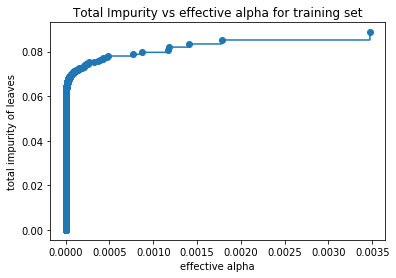

In [53]:
search_dt_X_train, search_dt_X_test, search_dt_y_train, search_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = DecisionTreeClassifier()
print(rf.get_params().keys())
path = rf.cost_complexity_pruning_path(search_dt_X_train, search_dt_y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

plt.show()





In [92]:
display(len(ccp_alphas))
ccp_alphas_lim = ccp_alphas[:5]

ccp_alphas_lim = np.append(ccp_alphas_lim,ccp_alphas[-30:])
display(len(ccp_alphas_lim))

clfs = []
for ccp_alpha in ccp_alphas_lim:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(search_dt_X_train, search_dt_y_train)
    clfs.append(clf)
    print(ccp_alpha)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

39219

35

0.0
2.1527010832149682e-07
2.4355488817907974e-07
2.4355488817907974e-07
2.58634067641751e-07
0.00013142357406129837
0.00014167089106658943
0.0001457563211616224
0.00014888533829146653
0.00015057734260612646
0.0001576264668483639
0.00017489072806700645
0.00018265861213962245
0.00019865771462095755
0.00020822865673857452
0.0002114199963169903
0.00022101496828609254
0.00022690364906770115
0.00023580593820920863
0.0002535675240512231
0.0002593132428666805
0.00026957862643911014
0.0003279461540423717
0.0003743356723132493
0.00038749367608704663
0.00042213345026389376
0.0004256200495907133
0.00047435074404844103
0.0004840361337728333
0.0007708617137247714
0.0008721590876498569
0.0011721734226947805
0.001183711799706012
0.0014057448766590826
0.0017807923720844776
Number of nodes in the last tree is: 5 with ccp_alpha: 0.0017807923720844776


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, 

/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, 

/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, 

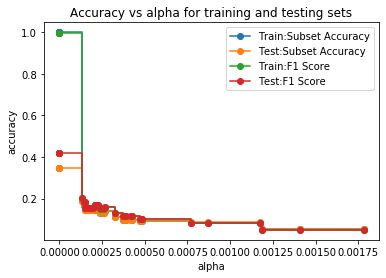

In [93]:
#train_scores = [clf.score(search_dt_X_train, search_dt_y_train) for clf in clfs]
#test_scores = [clf.score(search_dt_X_test, search_dt_y_test) for clf in clfs]

train_scores =[]
test_scores = []
train_fscores =[]
test_fscores = []

for clf in clfs:
    y_pred = clf.predict(search_dt_X_train)
    
    train_scores.append(accuracy_score(search_dt_y_train,y_pred))
    train_fscores.append(f1_score(search_dt_y_train,y_pred,average="samples"))
    
    y_pred = clf.predict(search_dt_X_test)

    test_scores.append(accuracy_score(search_dt_y_test,y_pred))
    test_fscores.append(f1_score(search_dt_y_test,y_pred,average="samples"))

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_lim, train_scores, marker='o', label="Train:Subset Accuracy",
        drawstyle="steps-post")
ax.plot(ccp_alphas_lim, test_scores, marker='o', label="Test:Subset Accuracy",
        drawstyle="steps-post")
ax.plot(ccp_alphas_lim, train_fscores, marker='o', label="Train:F1 Score",
        drawstyle="steps-post")
ax.plot(ccp_alphas_lim, test_fscores, marker='o', label="Test:F1 Score",
        drawstyle="steps-post")
ax.legend()
plt.show()

## estimators vs accuracies

In [9]:

n_estimators_list = [1,10,50,100,250,1000,2000]
accuracies =[]
f1s =[]
for i in n_estimators_list:
    print("Number of Estimators:", i)
    random_dt = RandomForestClassifier(n_estimators =i,n_jobs=4)
    random_dt_X_train, random_dt_X_test, random_dt_y_train, random_dt_y_test = train_test_split(spotify_feature_scaler, spotify_target, test_size=0.33,random_state = 42)
    #display(random_dt_y_test)
    random_dt.fit(random_dt_X_train, random_dt_y_train)
    random_dt_pred = random_dt.predict(random_dt_X_test)
    print("All labels Correct")
    acc = metrics.accuracy_score(random_dt_pred,random_dt_y_test)
    print(acc)
    accuracies.append(acc)


    precision = precision_score(random_dt_pred,random_dt_y_test.to_numpy(),average="samples")
    print("Precision Score:",precision)

    recall = recall_score(random_dt_pred,random_dt_y_test.to_numpy(),average="samples")
    print("Recall Score:", recall)

    f1 = f1_score(random_dt_pred,random_dt_y_test.to_numpy(),average="samples")
    print("F1:", f1)
    f1s.append(f1)

Number of Estimators: 1
All labels Correct
0.3147798957761931
Precision Score: 0.3934473607737115


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall Score: 0.3916891554345271
F1: 0.38318006266528615
Number of Estimators: 10


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


All labels Correct
0.27492457487657707
Precision Score: 0.29962658849881146


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall Score: 0.319953944962516
F1: 0.3044761627223572
Number of Estimators: 50


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


All labels Correct
0.28745543060888645
Precision Score: 0.31081738304208134


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall Score: 0.3301106235143536
F1: 0.3153353941915036
Number of Estimators: 100


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


All labels Correct
0.29232377948436644


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision Score: 0.3163983932163101
Recall Score: 0.3359360714938745


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


F1: 0.3209062959842924
Number of Estimators: 250
All labels Correct
0.292940894130554
Precision Score: 0.31632056003970427


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall Score: 0.33570179648930326
F1: 0.32089297686527524
Number of Estimators: 1000


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


All labels Correct
0.29422654964344486


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision Score: 0.31772249595120544
Recall Score: 0.3371902998720058


/Users/keeshanpatel/opt/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


F1: 0.3222800699178922
Number of Estimators: 2000


KeyboardInterrupt: 

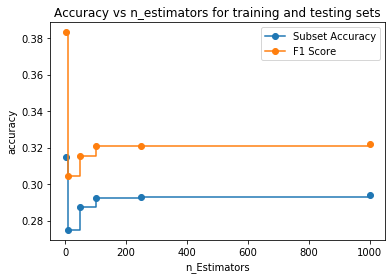

In [15]:
accuracies = [0.3147798957761931,0.27492457487657707,0.28745543060888645,0.29232377948436644,0.292940894130554,0.29422654964344486]
f1s = [0.38318006266528615, 0.3044761627223572,0.3153353941915036,0.3209062959842924,0.32089297686527524,0.3222800699178922]
fig, ax = plt.subplots()
ax.set_xlabel("n_Estimators")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs n_estimators for training and testing sets")
ax.plot(n_estimators_list[:-1], accuracies, marker='o', label="Subset Accuracy", drawstyle="steps-post")
ax.plot(n_estimators_list[:-1], f1s, marker='o', label="F1 Score", drawstyle="steps-post")

ax.legend()
plt.show()